In [1]:
from datetime import datetime
import os
import pickle
import neat
import numpy as np
from Neat.evaluation_util import DataManager
from Neat.selection_util import TournamentReproduction, FitnessPropReproduction
from data_load_util import load_state_data, make_dataset
from tqdm import tqdm
import random
from Neat.saving_util import *
from Neat.neat_util import *

Loading data_manager for NEAT
Loading Data
number of zip codes: 10559
number of zip codes with solar data: 10559
number of zip codes with census data: 10559
Removing Outliers
zips after removing outliers: 7795


In [2]:
config_path = 'Neat/neat-config'

#load datasets
combined_df = make_dataset(remove_outliers=True)
state_df = load_state_data(combined_df, load="Clean_Data/data_by_state.csv")
data_manager = DataManager(combined_df, state_df)
k_folds = 5

Loading Data
number of zip codes: 10559
number of zip codes with solar data: 10559
number of zip codes with census data: 10559
Removing Outliers
zips after removing outliers: 7795


In [3]:
#single model run
network = run(config_path, eval_genomes_lexicase, panels=2000000, threshold=0.2, pop_size=50, generations=10)
save_model(network, model_name="NEAT_model2M_lexicase_weighted.pkl")
cv_order = run_network(network, data_manager, cross_val=True)

loading configuration...
NUM_PANELS=[2000000] NUM_GENERATIONS=10 METRIC_WEIGHTS=[1.75, 2.25, 1.5, 1] OVERALL_THRESHOLD=0.2
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [02:39<00:00,  3.19s/it]


Population's average fitness: 0.83083 stdev: 1.66620
Best fitness: 4.66420 - size: (1, 6) - species 1 - id 13
Average adjusted fitness: 0.178
Mean genetic distance 1.209, standard deviation 0.356
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      4.7    0.178     0
Total extinctions: 0
Generation time: 927.781 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:43<00:00,  3.27s/it]


Population's average fitness: 0.86439 stdev: 1.73278
Best fitness: 4.66420 - size: (1, 6) - species 1 - id 13
Average adjusted fitness: 0.185
Mean genetic distance 1.165, standard deviation 0.431
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      4.7    0.185     1
Total extinctions: 0
Generation time: 908.906 sec (918.344 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-1

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.90440 stdev: 1.81179
Best fitness: 5.12499 - size: (1, 5) - species 1 - id 107
Average adjusted fitness: 0.176
Mean genetic distance 1.161, standard deviation 0.439
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      5.1    0.176     0
Total extinctions: 0
Generation time: 895.634 sec (910.774 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.91902 stdev: 1.84034
Best fitness: 4.99433 - size: (1, 4) - species 1 - id 161
Average adjusted fitness: 0.184
Mean genetic distance 1.248, standard deviation 0.401
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      5.0    0.184     1
Total extinctions: 0
Generation time: 921.103 sec (913.356 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-3

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


Population's average fitness: 0.93268 stdev: 1.86824
Best fitness: 4.99433 - size: (1, 4) - species 1 - id 161
Average adjusted fitness: 0.187
Mean genetic distance 1.683, standard deviation 0.401
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      5.0    0.187     2
Total extinctions: 0
Generation time: 956.722 sec (922.029 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.50s/it]


Population's average fitness: 0.93893 stdev: 1.87864
Best fitness: 4.99433 - size: (1, 4) - species 1 - id 161
Average adjusted fitness: 0.188
Mean genetic distance 1.649, standard deviation 0.443
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      5.0    0.188     3
Total extinctions: 0
Generation time: 942.630 sec (925.463 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.54s/it]


Population's average fitness: 0.95562 stdev: 1.91197
Best fitness: 4.99433 - size: (1, 4) - species 1 - id 161
Average adjusted fitness: 0.191
Mean genetic distance 1.852, standard deviation 0.446
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      5.0    0.191     4
Total extinctions: 0
Generation time: 958.487 sec (930.181 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [02:51<00:00,  3.43s/it]


Population's average fitness: 0.96815 stdev: 1.93708
Best fitness: 5.07564 - size: (1, 5) - species 1 - id 392
Average adjusted fitness: 0.191
Mean genetic distance 1.989, standard deviation 0.671
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    29      5.1    0.191     5
     2    0    21       --       --     0
Total extinctions: 0
Generation time: 962.608 sec (934.234 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-7

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [02:49<00:00,  3.39s/it]


Population's average fitness: 0.99107 stdev: 1.98241
Best fitness: 5.07564 - size: (1, 5) - species 1 - id 392
Average adjusted fitness: 0.188
Mean genetic distance 1.937, standard deviation 0.696
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    26      5.1    0.235     6
     2    1    24      5.0    0.141     0
Total extinctions: 0
Generation time: 876.170 sec (927.782 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [02:49<00:00,  3.39s/it]


Population's average fitness: 0.98627 stdev: 1.97346
Best fitness: 5.04776 - size: (1, 5) - species 2 - id 411
Average adjusted fitness: 0.197
Mean genetic distance 1.789, standard deviation 0.749
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    21      5.0    0.147     7
     2    2    29      5.0    0.248     1
Total extinctions: 0
Generation time: 879.860 sec (922.990 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

Best individual in generation 9 meets fitness threshold - complexity: (1, 5)
directory name: Neat/models\01-11-25


In [ ]:

#run lexicase
lexi_network, lexi_results = K_fold_run(config_path, data_manager, eval_genomes_lexicase, k=k_folds)
save_model(lexi_network, lexi_results, model_name="NEAT_model_lexicase.pkl", results_name="lexicase_results.pkl")


In [ ]:

#run fitness prop
fp_network, fp_results = K_fold_run(config_path, data_manager, eval_genomes_weighted_sum, reproduction_method=FitnessPropReproduction, k=k_folds)
save_model(fp_network, fp_results, model_name="NEAT_model_fitness_prop.pkl", results_name="fitness_prop_results.pkl")


In [ ]:

#tournament selection
tourney_network, tourney_results = K_fold_run(config_path, data_manager, eval_genomes_weighted_sum, reproduction_method=TournamentReproduction, k=k_folds)
save_model(tourney_network, tourney_results, model_name="NEAT_model_tournament.pkl", results_name="tournament_results.pkl")


In [5]:

# #run random selection
# rand_network, rand_results = K_fold_run(config_path, data_manager, eval_genomes_random, k=k_folds)
# save_model(rand_network, model_name="NEAT_model_random.pkl")


In [ ]:
# with open("NEAT/models/NEAT benchmark experiment/tournament_results.pkl", "wb") as f:
#     pickle.dump(tourney_results, f)

Run without K-fold


In [4]:
def get_scores(cv_order):
    IE = data_manager.score(cv_order, 'income_equity', NUM_PANELS, train=True)
    RE = data_manager.score(cv_order, 'racial_equity', NUM_PANELS, train=True)
    CO = data_manager.score(cv_order, 'carbon_offset', NUM_PANELS, train=True)
    EG = data_manager.score(cv_order, 'energy_generation', NUM_PANELS, train=True)
    return [IE, RE, CO, EG]

In [ ]:
# lexicase
lexi_network = run(config_path, eval_genomes_lexicase)
cv_order = run_network(lexi_network, data_manager)
lexi_results = get_scores(cv_order)
save_model(lexi_network, lexi_results, model_name="NEAT_model_lexicase.pkl", results_name="lexicase_results.pkl")

In [ ]:
#fitness prop
fp_network = run(config_path, eval_genomes_weighted_sum, reproduction_method=FitnessPropReproduction)
cv_order = run_network(fp_network, data_manager)
fp_results = get_scores(cv_order)
save_model(fp_network, fp_results, model_name="NEAT_model_fitness_prop.pkl", results_name="fitness_prop_results.pkl")

NUM_PANELS=[100000, 1000000] NUM_GENERATIONS=30 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.3
loading configuration...
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


Population's average fitness: 2.05488 stdev: 0.59072
Best fitness: 3.37913 - size: (1, 6) - species 1 - id 14
Average adjusted fitness: 0.467
Mean genetic distance 1.155, standard deviation 0.358
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    20      3.4    0.467     0
Total extinctions: 0
Generation time: 230.836 sec

 ****** Running generation 1 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.15s/it]


Population's average fitness: 2.50715 stdev: 0.46887
Best fitness: 3.38976 - size: (1, 5) - species 1 - id 39
Average adjusted fitness: 0.585
Mean genetic distance 1.034, standard deviation 0.345
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    20      3.4    0.585     0
Total extinctions: 0
Generation time: 229.804 sec (230.320 average)

 ****** Running generation 2 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.09s/it]


Population's average fitness: 2.84960 stdev: 0.40794
Best fitness: 3.38806 - size: (2, 7) - species 1 - id 42
Average adjusted fitness: 0.650
Mean genetic distance 1.448, standard deviation 0.437
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    20      3.4    0.650     1
Total extinctions: 0
Generation time: 210.988 sec (223.876 average)

 ****** Running generation 3 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


Population's average fitness: 3.02525 stdev: 0.36752
Best fitness: 3.39310 - size: (1, 5) - species 1 - id 75
Average adjusted fitness: 0.730
Mean genetic distance 1.552, standard deviation 0.429
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    20      3.4    0.730     0
Total extinctions: 0
Generation time: 242.231 sec (228.465 average)

 ****** Running generation 4 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.10s/it]


Population's average fitness: 3.08154 stdev: 0.25340
Best fitness: 3.37281 - size: (1, 4) - species 1 - id 94
Average adjusted fitness: 0.602
Mean genetic distance 1.216, standard deviation 0.413
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    20      3.4    0.602     1
Total extinctions: 0
Generation time: 233.025 sec (229.377 average)

 ****** Running generation 5 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.19s/it]


Population's average fitness: 3.06740 stdev: 0.59727
Best fitness: 3.40378 - size: (1, 4) - species 1 - id 94
Average adjusted fitness: 0.831
Mean genetic distance 1.220, standard deviation 0.389
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    20      3.4    0.831     0
Total extinctions: 0
Generation time: 267.975 sec (235.810 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 3.10443 stdev: 0.60469
Best fitness: 3.40474 - size: (1, 4) - species 1 - id 94
Average adjusted fitness: 0.852
Mean genetic distance 1.192, standard deviation 0.451
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    20      3.4    0.852     0
Total extinctions: 0
Generation time: 268.760 sec (240.517 average)

 ****** Running generation 7 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.19s/it]


Population's average fitness: 3.21355 stdev: 0.12878
Best fitness: 3.36664 - size: (1, 3) - species 1 - id 137
Average adjusted fitness: 0.383
Mean genetic distance 1.156, standard deviation 0.468
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    20      3.4    0.383     1
Total extinctions: 0
Generation time: 162.957 sec (230.822 average)

 ****** Running generation 8 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


Population's average fitness: 3.12575 stdev: 0.44820
Best fitness: 3.39305 - size: (1, 2) - species 1 - id 155
Average adjusted fitness: 0.849
Mean genetic distance 1.204, standard deviation 0.412
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    20      3.4    0.849     2
Total extinctions: 0
Generation time: 252.165 sec (233.194 average)

 ****** Running generation 9 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


Population's average fitness: 2.88979 stdev: 0.52702
Best fitness: 3.33927 - size: (1, 4) - species 1 - id 173
Average adjusted fitness: 0.760
Mean genetic distance 1.212, standard deviation 0.466
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    20      3.3    0.760     3
Total extinctions: 0
Generation time: 127.822 sec (222.656 average)

 ****** Running generation 10 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


Population's average fitness: 3.05286 stdev: 0.52904
Best fitness: 3.36813 - size: (1, 5) - species 1 - id 208
Average adjusted fitness: 0.852
Mean genetic distance 1.017, standard deviation 0.278
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    20      3.4    0.852     4
Total extinctions: 0
Generation time: 139.624 sec (213.535 average)

 ****** Running generation 11 ****** 



100%|██████████| 20/20 [01:04<00:00,  3.20s/it]


Population's average fitness: 3.17494 stdev: 0.23583
Best fitness: 3.36575 - size: (1, 3) - species 1 - id 229
Average adjusted fitness: 0.812
Mean genetic distance 1.335, standard deviation 0.366
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    20      3.4    0.812     5
Total extinctions: 0
Generation time: 179.491 sec (208.504 average)

 ****** Running generation 12 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.15s/it]


Population's average fitness: 3.04449 stdev: 0.28860
Best fitness: 3.32859 - size: (1, 3) - species 1 - id 231
Average adjusted fitness: 0.781
Mean genetic distance 1.271, standard deviation 0.439
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    20      3.3    0.781     6
Total extinctions: 0
Generation time: 93.523 sec (196.757 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-12

 ****** Running generation 13 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.09s/it]


Population's average fitness: 2.98777 stdev: 0.54998
Best fitness: 3.39321 - size: (1, 2) - species 1 - id 260
Average adjusted fitness: 0.813
Mean genetic distance 1.237, standard deviation 0.344
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    20      3.4    0.813     7
Total extinctions: 0
Generation time: 254.479 sec (197.982 average)

 ****** Running generation 14 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 3.00540 stdev: 0.52814
Best fitness: 3.38878 - size: (1, 2) - species 1 - id 285
Average adjusted fitness: 0.815
Mean genetic distance 1.261, standard deviation 0.375
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    20      3.4    0.815     8
Total extinctions: 0
Generation time: 188.900 sec (193.570 average)

 ****** Running generation 15 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.07s/it]


Population's average fitness: 3.00405 stdev: 0.52825
Best fitness: 3.40554 - size: (1, 3) - species 1 - id 296
Average adjusted fitness: 0.791
Mean genetic distance 1.006, standard deviation 0.436
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    20      3.4    0.791     0
Total extinctions: 0
Generation time: 203.738 sec (187.146 average)

 ****** Running generation 16 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


Population's average fitness: 3.02691 stdev: 0.59652
Best fitness: 3.41721 - size: (1, 3) - species 1 - id 311
Average adjusted fitness: 0.832
Mean genetic distance 1.160, standard deviation 0.463
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    20      3.4    0.832     0
Total extinctions: 0
Generation time: 172.471 sec (177.517 average)

 ****** Running generation 17 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


Population's average fitness: 3.01071 stdev: 0.49045
Best fitness: 3.41760 - size: (1, 3) - species 1 - id 339
Average adjusted fitness: 0.731
Mean genetic distance 1.297, standard deviation 0.370
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    20      3.4    0.731     0
Total extinctions: 0
Generation time: 221.322 sec (183.354 average)

 ****** Running generation 18 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


Population's average fitness: 2.72801 stdev: 0.69045
Best fitness: 3.33870 - size: (1, 3) - species 1 - id 360
Average adjusted fitness: 0.698
Mean genetic distance 1.191, standard deviation 0.269
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    20      3.3    0.698     1
Total extinctions: 0
Generation time: 109.922 sec (169.129 average)

 ****** Running generation 19 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 2.73275 stdev: 0.51351
Best fitness: 3.39065 - size: (1, 2) - species 1 - id 381
Average adjusted fitness: 0.658
Mean genetic distance 1.485, standard deviation 0.372
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    20      3.4    0.658     2
Total extinctions: 0
Generation time: 255.987 sec (181.946 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-19

 ****** Running generation 20 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


Population's average fitness: 2.89829 stdev: 0.67528
Best fitness: 3.43428 - size: (1, 2) - species 1 - id 381
Average adjusted fitness: 0.759
Mean genetic distance 1.707, standard deviation 0.371
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    20      3.4    0.759     0
Total extinctions: 0
Generation time: 192.431 sec (187.226 average)

 ****** Running generation 21 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


Population's average fitness: 3.08437 stdev: 0.50057
Best fitness: 3.36246 - size: (1, 2) - species 1 - id 419
Average adjusted fitness: 0.872
Mean genetic distance 1.537, standard deviation 0.469
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   21    20      3.4    0.872     1
Total extinctions: 0
Generation time: 153.148 sec (184.592 average)

 ****** Running generation 22 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.15s/it]


Population's average fitness: 3.06883 stdev: 0.53883
Best fitness: 3.40214 - size: (1, 2) - species 1 - id 435
Average adjusted fitness: 0.853
Mean genetic distance 1.410, standard deviation 0.427
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   22    20      3.4    0.853     2
Total extinctions: 0
Generation time: 216.215 sec (196.861 average)

 ****** Running generation 23 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.19s/it]


Population's average fitness: 2.96409 stdev: 0.62719
Best fitness: 3.30967 - size: (1, 2) - species 1 - id 443
Average adjusted fitness: 0.810
Mean genetic distance 1.435, standard deviation 0.528
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   23    20      3.3    0.810     3
Total extinctions: 0
Generation time: 119.735 sec (183.387 average)

 ****** Running generation 24 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.15s/it]


Population's average fitness: 2.74334 stdev: 0.77005
Best fitness: 3.39672 - size: (1, 2) - species 1 - id 458
Average adjusted fitness: 0.693
Mean genetic distance 1.424, standard deviation 0.506
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   24    20      3.4    0.693     4
Total extinctions: 0
Generation time: 255.188 sec (190.016 average)

 ****** Running generation 25 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.09s/it]


Population's average fitness: 2.70639 stdev: 0.76153
Best fitness: 3.40312 - size: (1, 2) - species 1 - id 478
Average adjusted fitness: 0.694
Mean genetic distance 1.725, standard deviation 0.876
Population of 20 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   25    18      3.4    0.694     5
     2    0     2       --       --     0
Total extinctions: 0
Generation time: 204.349 sec (190.077 average)

 ****** Running generation 26 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


Population's average fitness: 3.02997 stdev: 0.48374
Best fitness: 3.43447 - size: (1, 2) - species 1 - id 478
Average adjusted fitness: 0.617
Mean genetic distance 1.938, standard deviation 1.028
Population of 20 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   26    16      3.4    0.840     0
     2    1     4      2.3    0.395     0
Total extinctions: 0
Generation time: 193.980 sec (192.228 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-26

 ****** Running generation 27 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 2.51296 stdev: 0.85538
Best fitness: 3.38682 - size: (2, 3) - species 1 - id 524
Average adjusted fitness: 0.566
Mean genetic distance 2.026, standard deviation 0.742
Population of 20 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27    13      3.4    0.701     1
     2    2     7      2.2    0.430     1
Total extinctions: 0
Generation time: 251.014 sec (195.197 average)

 ****** Running generation 28 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


Population's average fitness: 2.92255 stdev: 0.59825
Best fitness: 3.38789 - size: (2, 2) - species 1 - id 538
Average adjusted fitness: 0.566
Mean genetic distance 2.003, standard deviation 0.593
Population of 20 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   28     9      3.4    0.961     2
     2    3    11      3.0    0.171     0
Total extinctions: 0
Generation time: 257.731 sec (209.978 average)

 ****** Running generation 29 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 2.83512 stdev: 0.64834
Best fitness: 3.38419 - size: (1, 2) - species 2 - id 557
Average adjusted fitness: 0.717
Mean genetic distance 1.931, standard deviation 0.587
Population of 20 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   29     7      3.4    0.792     3
     2    4    13      3.4    0.643     0
Total extinctions: 0
Generation time: 265.495 sec (210.929 average)

Best individual in generation 29 meets fitness threshold - complexity: (1, 2)
directory name: Neat/models\01-01-25


In [ ]:
#tournament
tourney_network = run(config_path, eval_genomes_weighted_sum, reproduction_method=TournamentReproduction)
cv_order = run_network(tourney_network, data_manager)
tourney_results = get_scores(cv_order)
save_model(tourney_network, tourney_results, model_name="NEAT_model_tournament.pkl", results_name="tournament_results.pkl")

NUM_PANELS=[100000, 1000000] NUM_GENERATIONS=30 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.3
loading configuration...
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.08s/it]


Population's average fitness: 2.32739 stdev: 0.55587
Best fitness: 3.14600 - size: (1, 6) - species 1 - id 17
Mean genetic distance 1.406, standard deviation 0.685
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    20      3.1       --     0
Total extinctions: 0
Generation time: 90.279 sec

 ****** Running generation 1 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.10s/it]


Population's average fitness: 2.85371 stdev: 0.44016
Best fitness: 3.43229 - size: (1, 5) - species 1 - id 25
Mean genetic distance 1.005, standard deviation 0.398
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    20      3.4       --     0
Total extinctions: 0
Generation time: 183.993 sec (137.136 average)

 ****** Running generation 2 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


Population's average fitness: 2.68757 stdev: 0.72306
Best fitness: 3.33882 - size: (1, 5) - species 1 - id 25
Mean genetic distance 0.706, standard deviation 0.401
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    20      3.3       --     1
Total extinctions: 0
Generation time: 149.903 sec (141.392 average)

 ****** Running generation 3 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


Population's average fitness: 2.99814 stdev: 0.41977
Best fitness: 3.38970 - size: (1, 5) - species 1 - id 66
Mean genetic distance 0.718, standard deviation 0.308
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    20      3.4       --     2
Total extinctions: 0
Generation time: 229.305 sec (163.370 average)

 ****** Running generation 4 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 2.87131 stdev: 0.59280
Best fitness: 3.39603 - size: (1, 5) - species 1 - id 79
Mean genetic distance 0.939, standard deviation 0.362
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    20      3.4       --     3
Total extinctions: 0
Generation time: 258.779 sec (182.452 average)

 ****** Running generation 5 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


Population's average fitness: 2.78297 stdev: 0.52548
Best fitness: 3.41602 - size: (1, 5) - species 1 - id 101
Mean genetic distance 0.937, standard deviation 0.352
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    20      3.4       --     4
Total extinctions: 0
Generation time: 168.249 sec (180.085 average)

 ****** Running generation 6 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.07s/it]


Population's average fitness: 2.52897 stdev: 0.68684
Best fitness: 3.43810 - size: (1, 5) - species 1 - id 101
Mean genetic distance 0.715, standard deviation 0.320
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    20      3.4       --     0
Total extinctions: 0
Generation time: 275.458 sec (193.709 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-6

 ****** Running generation 7 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


Population's average fitness: 2.92935 stdev: 0.50658
Best fitness: 3.38400 - size: (1, 5) - species 1 - id 101
Mean genetic distance 0.831, standard deviation 0.363
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    20      3.4       --     1
Total extinctions: 0
Generation time: 187.331 sec (192.912 average)

 ****** Running generation 8 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 2.87278 stdev: 0.48444
Best fitness: 3.35068 - size: (1, 5) - species 1 - id 168
Mean genetic distance 1.098, standard deviation 0.362
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    20      3.4       --     2
Total extinctions: 0
Generation time: 155.382 sec (188.742 average)

 ****** Running generation 9 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.10s/it]


Population's average fitness: 3.06448 stdev: 0.33698
Best fitness: 3.42134 - size: (1, 5) - species 1 - id 168
Mean genetic distance 1.192, standard deviation 0.280
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    20      3.4       --     3
Total extinctions: 0
Generation time: 176.717 sec (187.540 average)

 ****** Running generation 10 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


Population's average fitness: 2.75723 stdev: 0.60225
Best fitness: 3.32814 - size: (1, 5) - species 1 - id 192
Mean genetic distance 1.052, standard deviation 0.336
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    20      3.3       --     4
Total extinctions: 0
Generation time: 143.048 sec (192.816 average)

 ****** Running generation 11 ****** 



100%|██████████| 20/20 [01:00<00:00,  3.03s/it]


Population's average fitness: 2.79912 stdev: 0.62244
Best fitness: 3.28244 - size: (1, 5) - species 1 - id 220
Mean genetic distance 0.735, standard deviation 0.295
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    20      3.3       --     5
Total extinctions: 0
Generation time: 121.138 sec (186.531 average)

 ****** Running generation 12 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


Population's average fitness: 2.40489 stdev: 0.72478
Best fitness: 3.38078 - size: (1, 4) - species 1 - id 241
Mean genetic distance 0.698, standard deviation 0.217
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    20      3.4       --     6
Total extinctions: 0
Generation time: 188.555 sec (190.396 average)

 ****** Running generation 13 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.15s/it]


Population's average fitness: 2.76788 stdev: 0.74526
Best fitness: 3.39799 - size: (1, 3) - species 1 - id 267
Mean genetic distance 1.146, standard deviation 0.368
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    20      3.4       --     7
Total extinctions: 0
Generation time: 253.168 sec (192.782 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-13

 ****** Running generation 14 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


Population's average fitness: 2.87226 stdev: 0.64939
Best fitness: 3.30113 - size: (1, 3) - species 1 - id 284
Mean genetic distance 1.652, standard deviation 0.328
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    20      3.3       --     8
Total extinctions: 0
Generation time: 123.325 sec (179.237 average)

 ****** Running generation 15 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


Population's average fitness: 2.74548 stdev: 0.61923
Best fitness: 3.33636 - size: (1, 3) - species 1 - id 301
Mean genetic distance 1.137, standard deviation 0.295
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    20      3.3       --     9
Total extinctions: 0
Generation time: 125.317 sec (174.944 average)

 ****** Running generation 16 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 2.87501 stdev: 0.69822
Best fitness: 3.33556 - size: (1, 3) - species 1 - id 310
Mean genetic distance 0.946, standard deviation 0.476
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    20      3.3       --    10
Total extinctions: 0
Generation time: 131.722 sec (160.570 average)

 ****** Running generation 17 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 2.82260 stdev: 0.70938
Best fitness: 3.42997 - size: (2, 4) - species 1 - id 340
Mean genetic distance 1.255, standard deviation 0.382
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    20      3.4       --    11
Total extinctions: 0
Generation time: 220.475 sec (163.885 average)

 ****** Running generation 18 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.10s/it]


Population's average fitness: 2.98970 stdev: 0.42200
Best fitness: 3.34113 - size: (1, 3) - species 1 - id 346
Mean genetic distance 0.595, standard deviation 0.358
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    20      3.3       --    12
Total extinctions: 0
Generation time: 143.916 sec (162.738 average)

 ****** Running generation 19 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.15s/it]


Population's average fitness: 3.11373 stdev: 0.36767
Best fitness: 3.43544 - size: (1, 3) - species 1 - id 373
Mean genetic distance 0.691, standard deviation 0.284
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    20      3.4       --    13
Total extinctions: 0
Generation time: 197.491 sec (164.815 average)

 ****** Running generation 20 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.09s/it]


Population's average fitness: 3.23931 stdev: 0.30994
Best fitness: 3.41388 - size: (1, 3) - species 1 - id 384
Mean genetic distance 0.872, standard deviation 0.488
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   20    20      3.4       --    14
Total extinctions: 0
Generation time: 220.968 sec (172.608 average)

 ****** Running generation 21 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.15s/it]


Population's average fitness: 2.89015 stdev: 0.59056
Best fitness: 3.33965 - size: (1, 3) - species 1 - id 409
Mean genetic distance 0.807, standard deviation 0.431
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   21    20      3.3       --    15
Total extinctions: 0
Generation time: 137.665 sec (174.260 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-21

 ****** Running generation 22 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 2.75767 stdev: 0.75898
Best fitness: 3.43215 - size: (1, 3) - species 1 - id 430
Mean genetic distance 1.035, standard deviation 0.410
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   22    20      3.4       --    16
Total extinctions: 0
Generation time: 175.773 sec (172.982 average)

 ****** Running generation 23 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.10s/it]


Population's average fitness: 2.86850 stdev: 0.68634
Best fitness: 3.38708 - size: (1, 3) - species 1 - id 449
Mean genetic distance 0.769, standard deviation 0.378
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   23    20      3.4       --    17
Total extinctions: 0
Generation time: 244.057 sec (172.071 average)

 ****** Running generation 24 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.12s/it]


Population's average fitness: 3.09874 stdev: 0.12118
Best fitness: 3.21006 - size: (1, 2) - species 1 - id 474
Mean genetic distance 0.956, standard deviation 0.412
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   24    20      3.2       --    18
Total extinctions: 0
Generation time: 107.796 sec (170.518 average)

 ****** Running generation 25 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.11s/it]


Population's average fitness: 2.81427 stdev: 0.67999
Best fitness: 3.32497 - size: (1, 3) - species 1 - id 482
Mean genetic distance 0.721, standard deviation 0.314
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   25    20      3.3       --    19
Total extinctions: 0
Generation time: 121.982 sec (170.185 average)

 ****** Running generation 26 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.17s/it]


Population's average fitness: 2.84782 stdev: 0.57238
Best fitness: 3.34728 - size: (1, 3) - species 1 - id 503
Mean genetic distance 0.927, standard deviation 0.493
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   26    20      3.3       --    20
Total extinctions: 0
Generation time: 273.895 sec (184.402 average)

 ****** Running generation 27 ****** 



100%|██████████| 20/20 [01:01<00:00,  3.06s/it]


Population's average fitness: 2.96613 stdev: 0.52422
Best fitness: 3.38521 - size: (1, 2) - species 1 - id 522
Mean genetic distance 1.836, standard deviation 0.542
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   27    20      3.4       --    21
Total extinctions: 0
Generation time: 225.910 sec (184.945 average)

 ****** Running generation 28 ****** 



100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


Population's average fitness: 3.01742 stdev: 0.26093
Best fitness: 3.26437 - size: (1, 2) - species 1 - id 536
Mean genetic distance 1.894, standard deviation 0.233
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   28    20      3.3       --    22
Total extinctions: 0
Generation time: 105.647 sec (181.119 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-28

 ****** Running generation 29 ****** 



100%|██████████| 20/20 [01:03<00:00,  3.18s/it]


Population's average fitness: 2.66974 stdev: 0.60122
Best fitness: 3.38519 - size: (2, 3) - species 1 - id 566
Mean genetic distance 1.695, standard deviation 0.404
Population of 20 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   29    20      3.4       --    23
Total extinctions: 0
Generation time: 179.930 sec (179.362 average)

Best individual in generation 29 meets fitness threshold - complexity: (2, 3)
directory name: Neat/models\01-01-25


In [9]:

#print results
result_metrics = ['income_equity', 'racial_equity', 'carbon_offset', 'energy_generation']
for i, res in enumerate(lexi_results):
    print(f"Lexicase {result_metrics[i]}", res)

for i, res in enumerate(fp_results):
    print(f"Fitness prop {result_metrics[i]}", res)
    
for i, res in enumerate(tourney_results):
    print(f"Tourney {result_metrics[i]}", res)

# for i, res in enumerate(rand_results):
#     print(f"Random {result_metrics[i]}", res)

# for i, res in enumerate(rand_results):
#     print(f"Random {result_metrics[i]}", res)


Lexicase income_equity 0.966662932646708
Lexicase racial_equity 0.9077214422467004
Lexicase carbon_offset 0.945628847556702
Lexicase energy_generation 0.5467869741500684
Fitness prop income_equity 0.9705368865589978
Fitness prop racial_equity 0.9081013087588642
Fitness prop carbon_offset 0.9456261013178772
Fitness prop energy_generation 0.5466999340288948
Tourney income_equity 0.966662932646708
Tourney racial_equity 0.9130409349457124
Tourney carbon_offset 0.9456221905445263
Tourney energy_generation 0.5457064872840829


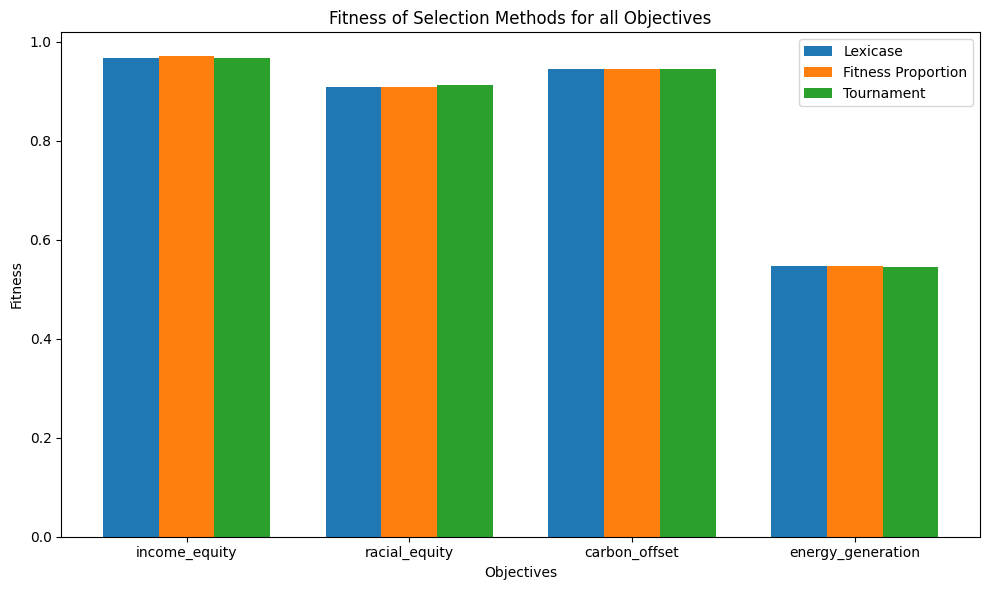

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Lexicase', 'Fitness Proportion', 'Tournament']
objectives = ['income_equity', 'racial_equity', 'carbon_offset', 'energy_generation']

# Example results for each method across objectives
results = [
    lexi_results,
    fp_results,
    tourney_results
]

# Configuration for the bar graph
x = np.arange(len(objectives))  # X positions for the groups
width = 0.25  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each method
for i, method in enumerate(methods):
    ax.bar(x + i * width, results[i], width, label=method)

# Add labels, title, and legend
ax.set_xlabel('Objectives')
ax.set_ylabel('Fitness')
ax.set_title('Fitness of Selection Methods for all Objectives')
ax.set_xticks(x + width)
ax.set_xticklabels(objectives)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# grid search


In [3]:
#get baseline for SQ
from projections_util import create_equity_projections, create_projections

#The model doesn't matter, just grab 100k panel SQ baseline
model_path = "Neat/models/01-01-25/NEAT_model_lexicase.pkl"
load = True
save_label = "100k_panels"

max_num_added = 100000
Energy_projections, Energy_picked = create_projections(combined_df, state_df, n=max_num_added, load=load, metric='energy_generation_per_panel', model_path=model_path, save_label=save_label)
Carbon_offset_projections, Carbon_offset_picked = create_projections(combined_df, state_df, n=max_num_added, load=load, metric='carbon_offset_kg_per_panel', model_path=model_path, save_label=save_label)
Racial_equity_projections = create_equity_projections(combined_df, Energy_picked, n=max_num_added, load=load, metric="black_prop", save_label=save_label)
Income_equity_projections = create_equity_projections(combined_df, Energy_picked, n=max_num_added, load=load, metric="Median_income", save_label=save_label)

SQ_baseline = [Energy_projections["Status-Quo"][100000],
               Carbon_offset_projections["Status-Quo"][100000],
               Racial_equity_projections["Status-Quo"][100000],
               Income_equity_projections["Status-Quo"][100000]]
print(SQ_baseline)


[47673293.73634648, 14828201.26916047, -138438.3073647724, 172065.15634731413]


In [20]:
import pandas as pd
import itertools
import numpy as np

# Define hyperparameters and their values
hyperparams = {
    "threshold_options": [0.001, 0.05, 0.1, 0.2, 0.3, 0.5],
    "pop_size_options": [50],
    "generations_options": [5, 20],
}

# Generate all combinations of hyperparameters
combinations = list(itertools.product(*hyperparams.values()))

# Create DataFrame
results_df = pd.DataFrame(combinations, columns=hyperparams.keys())

#initialize objective cols
results_df["energy_generation_per_panel"] = 0
results_df["carbon_offset_kg_per_panel"] = 0
results_df["black_prop"] = 0
results_df["Median_income"] = 0

results_df.head()


,threshold_options,pop_size_options,generations_options,energy_generation_per_panel,carbon_offset_kg_per_panel,black_prop,Median_income
0,0.001,50,5,0,0,0,0
1,0.001,50,20,0,0,0,0
2,0.050,50,5,0,0,0,0
3,0.050,50,20,0,0,0,0
4,0.100,50,5,0,0,0,0


In [21]:
from projections_util import create_equity_projection_from_picked, create_neat_projection

for index, row in results_df.iterrows():

    threshold = row["threshold_options"]
    pop_size = int(row["pop_size_options"])
    generations = int(row["generations_options"])

    #run these hyperparams and save results
    network = run(config_path, eval_genomes_lexicase, panels=100000, threshold=threshold, pop_size=pop_size, generations=generations)

    EG, picked = create_neat_projection(combined_df, state_df, n=100000, metric = "energy_generation_per_panel", network=network, record=True)
    results_df.loc[index, "energy_generation_per_panel"] = EG[-1]

    CO, _ = create_neat_projection(combined_df, state_df, n=100000, metric = "carbon_offset_kg_per_panel", network=network, record=True)
    results_df.loc[index, "carbon_offset_kg_per_panel"] = CO[-1]

    RE = create_equity_projection_from_picked(combined_df, picked, n=100000, metric = "black_prop")
    results_df.loc[index, "black_prop"] = RE[-1]

    IE = create_equity_projection_from_picked(combined_df, picked, n=100000, metric = "Median_income")
    results_df.loc[index, "Median_income"] = IE[-1]

    print("Hyperparams:", [threshold, pop_size, generations])
    print("Results:", [EG[-1], CO[-1], RE[-1], IE[-1]])
    print("-----------")

loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.001
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:09<00:00,  3.80s/it]


Population's average fitness: 0.06287 stdev: 0.44009
Best fitness: 3.14347 - size: (1, 6) - species 1 - id 11
Average adjusted fitness: 0.020
Mean genetic distance 0.776, standard deviation 0.410
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.1    0.020     0
Total extinctions: 0
Generation time: 212.123 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.04s/it]


Population's average fitness: 0.06453 stdev: 0.45172
Best fitness: 3.22658 - size: (1, 5) - species 1 - id 51
Average adjusted fitness: 0.020
Mean genetic distance 0.760, standard deviation 0.354
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.2    0.020     0
Total extinctions: 0
Generation time: 223.339 sec (217.731 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.05s/it]


Population's average fitness: 0.06133 stdev: 0.42930
Best fitness: 3.06644 - size: (1, 2) - species 1 - id 100
Average adjusted fitness: 0.020
Mean genetic distance 1.066, standard deviation 0.483
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.1    0.020     1
Total extinctions: 0
Generation time: 223.783 sec (219.748 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.00s/it]


Population's average fitness: 0.06133 stdev: 0.42930
Best fitness: 3.06644 - size: (1, 2) - species 1 - id 100
Average adjusted fitness: 0.020
Mean genetic distance 1.119, standard deviation 0.418
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.1    0.020     2
Total extinctions: 0
Generation time: 223.202 sec (220.612 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:26<00:00,  4.14s/it]


Population's average fitness: 0.06466 stdev: 0.45263
Best fitness: 3.23307 - size: (1, 4) - species 1 - id 225
Average adjusted fitness: 0.020
Mean genetic distance 0.829, standard deviation 0.323
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.2    0.020     0
Total extinctions: 0
Generation time: 230.973 sec (222.684 average)

Best individual in generation 4 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.001, 50, 5]
Results: [41001633.49060264, 24678690.126295164, -14208.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.001
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


Population's average fitness: 0.06928 stdev: 0.48493
Best fitness: 3.46380 - size: (1, 6) - species 1 - id 22
Average adjusted fitness: 0.020
Mean genetic distance 0.858, standard deviation 0.393
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.020     0
Total extinctions: 0
Generation time: 230.074 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.58s/it]


Population's average fitness: 0.05943 stdev: 0.41600
Best fitness: 2.97146 - size: (1, 5) - species 1 - id 59
Average adjusted fitness: 0.020
Mean genetic distance 0.786, standard deviation 0.342
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.0    0.020     1
Total extinctions: 0
Generation time: 199.198 sec (214.636 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [04:28<00:00,  5.38s/it]


Population's average fitness: 0.06095 stdev: 0.42668
Best fitness: 3.04771 - size: (1, 4) - species 1 - id 137
Average adjusted fitness: 0.020
Mean genetic distance 0.943, standard deviation 0.429
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.0    0.020     2
Total extinctions: 0
Generation time: 295.751 sec (241.674 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [04:27<00:00,  5.35s/it]


Population's average fitness: 0.06072 stdev: 0.42506
Best fitness: 3.03615 - size: (1, 4) - species 1 - id 179
Average adjusted fitness: 0.020
Mean genetic distance 1.141, standard deviation 0.450
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.0    0.020     3
Total extinctions: 0
Generation time: 295.810 sec (255.208 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [04:58<00:00,  5.96s/it]


Population's average fitness: 0.05995 stdev: 0.41962
Best fitness: 2.99728 - size: (1, 3) - species 1 - id 244
Average adjusted fitness: 0.020
Mean genetic distance 0.992, standard deviation 0.387
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.0    0.020     4
Total extinctions: 0
Generation time: 330.233 sec (270.213 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [05:22<00:00,  6.46s/it]


Population's average fitness: 0.06153 stdev: 0.43068
Best fitness: 3.07630 - size: (1, 5) - species 1 - id 250
Average adjusted fitness: 0.020
Mean genetic distance 0.884, standard deviation 0.410
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      3.1    0.020     5
Total extinctions: 0
Generation time: 354.851 sec (284.319 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [04:39<00:00,  5.59s/it]


Population's average fitness: 0.06199 stdev: 0.43395
Best fitness: 3.09963 - size: (1, 4) - species 1 - id 335
Average adjusted fitness: 0.020
Mean genetic distance 0.940, standard deviation 0.459
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      3.1    0.020     6
Total extinctions: 0
Generation time: 305.456 sec (287.339 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:47<00:00,  4.55s/it]


Population's average fitness: 0.06170 stdev: 0.43187
Best fitness: 3.08478 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.020
Mean genetic distance 0.839, standard deviation 0.361
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    50      3.1    0.020     7
Total extinctions: 0
Generation time: 260.516 sec (283.986 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:37<00:00,  4.35s/it]


Population's average fitness: 0.06102 stdev: 0.42717
Best fitness: 3.05124 - size: (2, 6) - species 1 - id 419
Average adjusted fitness: 0.020
Mean genetic distance 1.356, standard deviation 0.428
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    50      3.1    0.020     8
Total extinctions: 0
Generation time: 239.893 sec (279.087 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:46<00:00,  4.53s/it]


Population's average fitness: 0.06194 stdev: 0.43359
Best fitness: 3.09708 - size: (3, 7) - species 1 - id 483
Average adjusted fitness: 0.020
Mean genetic distance 1.523, standard deviation 0.438
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    50      3.1    0.020     9
Total extinctions: 0
Generation time: 251.643 sec (276.342 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:49<00:00,  4.59s/it]


Population's average fitness: 0.06881 stdev: 0.48167
Best fitness: 3.44050 - size: (4, 8) - species 1 - id 518
Average adjusted fitness: 0.020
Mean genetic distance 1.787, standard deviation 0.422
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    50      3.4    0.020    10
Total extinctions: 0
Generation time: 253.860 sec (278.721 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:34<00:00,  4.30s/it]


Population's average fitness: 0.06219 stdev: 0.43534
Best fitness: 3.10955 - size: (4, 8) - species 1 - id 558
Average adjusted fitness: 0.020
Mean genetic distance 1.699, standard deviation 0.452
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    50      3.1    0.020    11
Total extinctions: 0
Generation time: 252.162 sec (284.018 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [04:46<00:00,  5.73s/it]


Population's average fitness: 0.06219 stdev: 0.43534
Best fitness: 3.10955 - size: (4, 8) - species 1 - id 558
Average adjusted fitness: 0.020
Mean genetic distance 1.583, standard deviation 0.554
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    50      3.1    0.020    12
Total extinctions: 0
Generation time: 318.777 sec (286.320 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [04:25<00:00,  5.31s/it]


Population's average fitness: 0.06168 stdev: 0.43176
Best fitness: 3.08403 - size: (4, 8) - species 1 - id 682
Average adjusted fitness: 0.020
Mean genetic distance 1.717, standard deviation 0.583
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    50      3.1    0.020    13
Total extinctions: 0
Generation time: 296.627 sec (286.402 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [04:59<00:00,  5.99s/it]


Population's average fitness: 0.06226 stdev: 0.43581
Best fitness: 3.11290 - size: (4, 9) - species 1 - id 705
Average adjusted fitness: 0.020
Mean genetic distance 1.613, standard deviation 0.561
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    50      3.1    0.020    14
Total extinctions: 0
Generation time: 334.153 sec (286.794 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-14

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [05:10<00:00,  6.20s/it]


Population's average fitness: 0.06201 stdev: 0.43408
Best fitness: 3.10058 - size: (4, 8) - species 1 - id 761
Average adjusted fitness: 0.020
Mean genetic distance 1.487, standard deviation 0.615
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    50      3.1    0.020    15
Total extinctions: 0
Generation time: 352.201 sec (286.529 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [05:30<00:00,  6.61s/it]


Population's average fitness: 0.06201 stdev: 0.43408
Best fitness: 3.10058 - size: (4, 8) - species 1 - id 761
Average adjusted fitness: 0.020
Mean genetic distance 1.707, standard deviation 0.501
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    50      3.1    0.020    16
Total extinctions: 0
Generation time: 370.658 sec (293.049 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [04:34<00:00,  5.49s/it]


Population's average fitness: 0.06359 stdev: 0.44512
Best fitness: 3.17943 - size: (5, 8) - species 1 - id 851
Average adjusted fitness: 0.020
Mean genetic distance 1.640, standard deviation 0.607
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    50      3.2    0.020    17
Total extinctions: 0
Generation time: 314.542 sec (298.452 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [05:04<00:00,  6.08s/it]


Population's average fitness: 0.06362 stdev: 0.44533
Best fitness: 3.18093 - size: (5, 8) - species 1 - id 886
Average adjusted fitness: 0.020
Mean genetic distance 1.516, standard deviation 0.675
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    50      3.2    0.020    18
Total extinctions: 0
Generation time: 322.844 sec (306.747 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-18

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.06594 stdev: 0.46159
Best fitness: 3.29710 - size: (5, 9) - species 1 - id 942
Average adjusted fitness: 0.020
Mean genetic distance 1.768, standard deviation 0.593
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    50      3.3    0.020    19
Total extinctions: 0
Generation time: 192.333 sec (300.816 average)

Best individual in generation 19 meets fitness threshold - complexity: (5, 9)
Hyperparams: [0.001, 50, 20]
Results: [41880772.853147075, 25410642.38646352, -14208.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.05
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.74s/it]


Population's average fitness: 0.19432 stdev: 0.76917
Best fitness: 3.25974 - size: (1, 6) - species 1 - id 50
Average adjusted fitness: 0.060
Mean genetic distance 1.253, standard deviation 0.503
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.060     0
Total extinctions: 0
Generation time: 218.128 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 0.20003 stdev: 0.79181
Best fitness: 3.39047 - size: (1, 5) - species 1 - id 82
Average adjusted fitness: 0.059
Mean genetic distance 1.268, standard deviation 0.415
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.4    0.059     0
Total extinctions: 0
Generation time: 217.357 sec (217.742 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:05<00:00,  3.71s/it]


Population's average fitness: 0.20144 stdev: 0.79736
Best fitness: 3.39047 - size: (1, 5) - species 1 - id 82
Average adjusted fitness: 0.059
Mean genetic distance 1.158, standard deviation 0.384
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.4    0.059     1
Total extinctions: 0
Generation time: 216.509 sec (217.331 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.20658 stdev: 0.81774
Best fitness: 3.47884 - size: (1, 4) - species 1 - id 189
Average adjusted fitness: 0.059
Mean genetic distance 1.208, standard deviation 0.398
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.059     0
Total extinctions: 0
Generation time: 202.695 sec (213.672 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:51<00:00,  3.43s/it]


Population's average fitness: 0.20734 stdev: 0.82076
Best fitness: 3.50112 - size: (2, 5) - species 1 - id 213
Average adjusted fitness: 0.059
Mean genetic distance 1.380, standard deviation 0.287
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.059     0
Total extinctions: 0
Generation time: 200.351 sec (211.008 average)

Best individual in generation 4 meets fitness threshold - complexity: (2, 5)
Hyperparams: [0.05, 50, 5]
Results: [51731112.24147917, 23953762.821328267, -42922.39391735679, 44746.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.05
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [02:52<00:00,  3.44s/it]


Population's average fitness: 0.19657 stdev: 0.77821
Best fitness: 3.33397 - size: (1, 6) - species 1 - id 27
Average adjusted fitness: 0.059
Mean genetic distance 0.939, standard deviation 0.376
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.059     0
Total extinctions: 0
Generation time: 200.402 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.20922 stdev: 0.82812
Best fitness: 3.48880 - size: (1, 6) - species 1 - id 78
Average adjusted fitness: 0.060
Mean genetic distance 1.156, standard deviation 0.358
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.060     0
Total extinctions: 0
Generation time: 201.641 sec (201.022 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.20851 stdev: 0.82532
Best fitness: 3.48034 - size: (1, 6) - species 1 - id 117
Average adjusted fitness: 0.060
Mean genetic distance 1.196, standard deviation 0.455
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.060     1
Total extinctions: 0
Generation time: 202.313 sec (201.452 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.46s/it]


Population's average fitness: 0.20908 stdev: 0.82757
Best fitness: 3.49237 - size: (1, 5) - species 1 - id 149
Average adjusted fitness: 0.060
Mean genetic distance 0.947, standard deviation 0.334
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.060     0
Total extinctions: 0
Generation time: 201.547 sec (201.476 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.20856 stdev: 0.82551
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 240
Average adjusted fitness: 0.060
Mean genetic distance 1.149, standard deviation 0.315
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.060     1
Total extinctions: 0
Generation time: 203.484 sec (201.878 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.48s/it]


Population's average fitness: 0.20760 stdev: 0.82174
Best fitness: 3.48905 - size: (1, 5) - species 1 - id 255
Average adjusted fitness: 0.060
Mean genetic distance 1.289, standard deviation 0.392
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      3.5    0.060     2
Total extinctions: 0
Generation time: 202.801 sec (202.032 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [02:52<00:00,  3.46s/it]


Population's average fitness: 0.20922 stdev: 0.82810
Best fitness: 3.48905 - size: (1, 5) - species 1 - id 255
Average adjusted fitness: 0.060
Mean genetic distance 1.373, standard deviation 0.383
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      3.5    0.060     3
Total extinctions: 0
Generation time: 201.266 sec (201.922 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.20883 stdev: 0.82656
Best fitness: 3.48663 - size: (1, 5) - species 1 - id 347
Average adjusted fitness: 0.060
Mean genetic distance 1.434, standard deviation 0.417
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    50      3.5    0.060     4
Total extinctions: 0
Generation time: 203.781 sec (202.155 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.46s/it]


Population's average fitness: 0.20908 stdev: 0.82756
Best fitness: 3.48464 - size: (3, 6) - species 1 - id 425
Average adjusted fitness: 0.060
Mean genetic distance 1.670, standard deviation 0.318
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    50      3.5    0.060     5
Total extinctions: 0
Generation time: 204.538 sec (202.420 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:02<00:00,  3.65s/it]


Population's average fitness: 0.20926 stdev: 0.82828
Best fitness: 3.49031 - size: (3, 6) - species 1 - id 491
Average adjusted fitness: 0.060
Mean genetic distance 1.525, standard deviation 0.354
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    50      3.5    0.060     6
Total extinctions: 0
Generation time: 211.342 sec (203.312 average)

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.52s/it]


Population's average fitness: 0.20635 stdev: 0.81681
Best fitness: 3.49031 - size: (3, 6) - species 1 - id 491
Average adjusted fitness: 0.059
Mean genetic distance 1.560, standard deviation 0.367
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    50      3.5    0.059     7
Total extinctions: 0
Generation time: 204.520 sec (203.723 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.20820 stdev: 0.82411
Best fitness: 3.49031 - size: (3, 6) - species 1 - id 491
Average adjusted fitness: 0.060
Mean genetic distance 1.387, standard deviation 0.334
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    50      3.5    0.060     8
Total extinctions: 0
Generation time: 205.918 sec (204.151 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-11

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:03<00:00,  3.67s/it]


Population's average fitness: 0.20947 stdev: 0.82911
Best fitness: 3.49344 - size: (3, 6) - species 1 - id 631
Average adjusted fitness: 0.060
Mean genetic distance 1.481, standard deviation 0.354
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    50      3.5    0.060     0
Total extinctions: 0
Generation time: 212.818 sec (205.202 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.57s/it]


Population's average fitness: 0.20619 stdev: 0.81617
Best fitness: 3.49344 - size: (3, 6) - species 1 - id 631
Average adjusted fitness: 0.059
Mean genetic distance 1.532, standard deviation 0.368
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    50      3.5    0.059     1
Total extinctions: 0
Generation time: 207.279 sec (205.775 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


Population's average fitness: 0.19929 stdev: 0.78949
Best fitness: 3.43988 - size: (3, 6) - species 1 - id 696
Average adjusted fitness: 0.058
Mean genetic distance 1.368, standard deviation 0.337
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    50      3.4    0.058     2
Total extinctions: 0
Generation time: 207.380 sec (206.164 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Population's average fitness: 0.20473 stdev: 0.81036
Best fitness: 3.43988 - size: (3, 6) - species 1 - id 696
Average adjusted fitness: 0.060
Mean genetic distance 1.059, standard deviation 0.389
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    50      3.4    0.060     3
Total extinctions: 0
Generation time: 206.400 sec (206.524 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Population's average fitness: 0.20738 stdev: 0.82089
Best fitness: 3.50136 - size: (3, 6) - species 1 - id 788
Average adjusted fitness: 0.059
Mean genetic distance 1.101, standard deviation 0.343
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    50      3.5    0.059     0
Total extinctions: 0
Generation time: 206.455 sec (207.043 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.57s/it]


Population's average fitness: 0.20374 stdev: 0.80672
Best fitness: 3.50136 - size: (3, 6) - species 1 - id 788
Average adjusted fitness: 0.058
Mean genetic distance 1.004, standard deviation 0.349
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    50      3.5    0.058     1
Total extinctions: 0
Generation time: 206.671 sec (207.332 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-17

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.54s/it]


Population's average fitness: 0.20831 stdev: 0.82456
Best fitness: 3.50136 - size: (3, 6) - species 1 - id 788
Average adjusted fitness: 0.059
Mean genetic distance 1.085, standard deviation 0.339
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    50      3.5    0.059     2
Total extinctions: 0
Generation time: 206.138 sec (207.492 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.58s/it]


Population's average fitness: 0.20928 stdev: 0.82838
Best fitness: 3.50136 - size: (3, 6) - species 1 - id 788
Average adjusted fitness: 0.060
Mean genetic distance 1.033, standard deviation 0.323
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    50      3.5    0.060     3
Total extinctions: 0
Generation time: 208.711 sec (207.229 average)

Best individual in generation 19 meets fitness threshold - complexity: (3, 6)
Hyperparams: [0.05, 50, 20]
Results: [47184292.324825995, 25988427.754373703, -14208.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.1
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:01<00:00,  3.64s/it]


Population's average fitness: 0.29815 stdev: 0.89591
Best fitness: 3.29036 - size: (1, 6) - species 1 - id 27
Average adjusted fitness: 0.091
Mean genetic distance 1.136, standard deviation 0.361
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.091     0
Total extinctions: 0
Generation time: 222.661 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [04:22<00:00,  5.24s/it]


Population's average fitness: 0.31559 stdev: 0.94775
Best fitness: 3.32747 - size: (1, 6) - species 1 - id 65
Average adjusted fitness: 0.095
Mean genetic distance 1.110, standard deviation 0.345
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.3    0.095     0
Total extinctions: 0
Generation time: 311.067 sec (266.864 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [04:54<00:00,  5.89s/it]


Population's average fitness: 0.33523 stdev: 1.00591
Best fitness: 3.48191 - size: (1, 4) - species 1 - id 117
Average adjusted fitness: 0.096
Mean genetic distance 1.040, standard deviation 0.343
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.096     0
Total extinctions: 0
Generation time: 335.558 sec (289.762 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:09<00:00,  3.80s/it]


Population's average fitness: 0.33053 stdev: 0.99164
Best fitness: 3.36084 - size: (1, 5) - species 1 - id 177
Average adjusted fitness: 0.098
Mean genetic distance 1.360, standard deviation 0.421
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.4    0.098     1
Total extinctions: 0
Generation time: 224.163 sec (273.362 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:02<00:00,  3.65s/it]


Population's average fitness: 0.34468 stdev: 1.03410
Best fitness: 3.48560 - size: (1, 4) - species 1 - id 216
Average adjusted fitness: 0.099
Mean genetic distance 1.772, standard deviation 0.487
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.099     0
Total extinctions: 0
Generation time: 217.360 sec (262.162 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

Best individual in generation 4 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.1, 50, 5]
Results: [52037212.95267873, 25785666.802943457, -109772.39391735679, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.1
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:00<00:00,  3.62s/it]


Population's average fitness: 0.32779 stdev: 0.98373
Best fitness: 3.42980 - size: (1, 6) - species 1 - id 28
Average adjusted fitness: 0.096
Mean genetic distance 1.283, standard deviation 0.477
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.4    0.096     0
Total extinctions: 0
Generation time: 214.374 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.54s/it]


Population's average fitness: 0.32697 stdev: 0.98092
Best fitness: 3.29809 - size: (1, 5) - species 1 - id 78
Average adjusted fitness: 0.099
Mean genetic distance 1.173, standard deviation 0.341
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.3    0.099     1
Total extinctions: 0
Generation time: 210.078 sec (212.226 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.56s/it]


Population's average fitness: 0.33048 stdev: 0.99159
Best fitness: 3.40933 - size: (1, 6) - species 1 - id 130
Average adjusted fitness: 0.097
Mean genetic distance 1.159, standard deviation 0.431
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.4    0.097     2
Total extinctions: 0
Generation time: 211.210 sec (211.887 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.50s/it]


Population's average fitness: 0.33520 stdev: 1.00585
Best fitness: 3.45178 - size: (1, 5) - species 1 - id 181
Average adjusted fitness: 0.097
Mean genetic distance 1.232, standard deviation 0.408
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.097     0
Total extinctions: 0
Generation time: 208.654 sec (211.079 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.33952 stdev: 1.01864
Best fitness: 3.45178 - size: (1, 5) - species 1 - id 181
Average adjusted fitness: 0.098
Mean genetic distance 1.207, standard deviation 0.392
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.098     1
Total extinctions: 0
Generation time: 208.256 sec (210.514 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.34115 stdev: 1.02365
Best fitness: 3.45470 - size: (1, 5) - species 1 - id 273
Average adjusted fitness: 0.099
Mean genetic distance 1.191, standard deviation 0.330
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      3.5    0.099     0
Total extinctions: 0
Generation time: 207.865 sec (210.073 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.34058 stdev: 1.02190
Best fitness: 3.45354 - size: (1, 4) - species 1 - id 327
Average adjusted fitness: 0.099
Mean genetic distance 1.146, standard deviation 0.376
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      3.5    0.099     1
Total extinctions: 0
Generation time: 207.049 sec (209.641 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.34173 stdev: 1.02522
Best fitness: 3.45354 - size: (1, 4) - species 1 - id 327
Average adjusted fitness: 0.099
Mean genetic distance 1.031, standard deviation 0.393
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    50      3.5    0.099     2
Total extinctions: 0
Generation time: 207.708 sec (209.399 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.33257 stdev: 0.99791
Best fitness: 3.45354 - size: (1, 4) - species 1 - id 327
Average adjusted fitness: 0.096
Mean genetic distance 1.143, standard deviation 0.363
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    50      3.5    0.096     3
Total extinctions: 0
Generation time: 207.336 sec (209.170 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.48s/it]


Population's average fitness: 0.33467 stdev: 1.00420
Best fitness: 3.45354 - size: (1, 4) - species 1 - id 327
Average adjusted fitness: 0.097
Mean genetic distance 1.065, standard deviation 0.528
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    50      3.5    0.097     4
Total extinctions: 0
Generation time: 206.445 sec (208.898 average)

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.46s/it]


Population's average fitness: 0.34403 stdev: 1.03223
Best fitness: 3.49273 - size: (1, 5) - species 1 - id 504
Average adjusted fitness: 0.098
Mean genetic distance 1.251, standard deviation 0.506
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    50      3.5    0.098     0
Total extinctions: 0
Generation time: 205.970 sec (208.057 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.33314 stdev: 0.99950
Best fitness: 3.39861 - size: (1, 4) - species 1 - id 570
Average adjusted fitness: 0.098
Mean genetic distance 1.432, standard deviation 0.416
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    50      3.4    0.098     1
Total extinctions: 0
Generation time: 206.774 sec (207.727 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-11

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [02:52<00:00,  3.46s/it]


Population's average fitness: 0.32935 stdev: 0.98891
Best fitness: 3.48966 - size: (1, 4) - species 1 - id 613
Average adjusted fitness: 0.094
Mean genetic distance 1.539, standard deviation 0.368
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    50      3.5    0.094     2
Total extinctions: 0
Generation time: 206.183 sec (207.224 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.48s/it]


Population's average fitness: 0.33188 stdev: 0.99776
Best fitness: 3.48966 - size: (1, 4) - species 1 - id 613
Average adjusted fitness: 0.095
Mean genetic distance 1.530, standard deviation 0.494
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    50      3.5    0.095     3
Total extinctions: 0
Generation time: 207.149 sec (207.074 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.34507 stdev: 1.03537
Best fitness: 3.48966 - size: (1, 4) - species 1 - id 613
Average adjusted fitness: 0.099
Mean genetic distance 1.474, standard deviation 0.415
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    50      3.5    0.099     4
Total extinctions: 0
Generation time: 206.277 sec (206.876 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.34181 stdev: 1.02583
Best fitness: 3.48966 - size: (1, 4) - species 1 - id 613
Average adjusted fitness: 0.098
Mean genetic distance 1.647, standard deviation 0.434
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    50      3.5    0.098     5
Total extinctions: 0
Generation time: 206.095 sec (206.699 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [02:52<00:00,  3.44s/it]


Population's average fitness: 0.34791 stdev: 1.04374
Best fitness: 3.49228 - size: (1, 4) - species 1 - id 794
Average adjusted fitness: 0.100
Mean genetic distance 1.386, standard deviation 0.336
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    50      3.5    0.100     6
Total extinctions: 0
Generation time: 205.195 sec (206.513 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.53s/it]


Population's average fitness: 0.34831 stdev: 1.04495
Best fitness: 3.49275 - size: (1, 4) - species 1 - id 855
Average adjusted fitness: 0.100
Mean genetic distance 0.972, standard deviation 0.381
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    50      3.5    0.100     0
Total extinctions: 0
Generation time: 210.605 sec (206.803 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-17

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.34864 stdev: 1.04593
Best fitness: 3.49100 - size: (1, 4) - species 1 - id 885
Average adjusted fitness: 0.100
Mean genetic distance 1.080, standard deviation 0.421
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    50      3.5    0.100     1
Total extinctions: 0
Generation time: 206.695 sec (206.739 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.50s/it]


Population's average fitness: 0.34080 stdev: 1.02268
Best fitness: 3.49100 - size: (1, 4) - species 1 - id 885
Average adjusted fitness: 0.098
Mean genetic distance 1.368, standard deviation 0.428
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    50      3.5    0.098     2
Total extinctions: 0
Generation time: 207.226 sec (206.817 average)

Best individual in generation 19 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.1, 50, 20]
Results: [49474484.683405384, 25869272.216779806, -60334.39391735679, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.2
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.63338 stdev: 1.26735
Best fitness: 3.26157 - size: (1, 6) - species 1 - id 31
Average adjusted fitness: 0.194
Mean genetic distance 1.253, standard deviation 0.383
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.194     0
Total extinctions: 0
Generation time: 214.415 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.65227 stdev: 1.30456
Best fitness: 3.28213 - size: (1, 5) - species 1 - id 83
Average adjusted fitness: 0.199
Mean genetic distance 1.405, standard deviation 0.349
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.3    0.199     0
Total extinctions: 0
Generation time: 214.743 sec (214.579 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:15<00:00,  3.92s/it]


Population's average fitness: 0.65268 stdev: 1.30542
Best fitness: 3.30485 - size: (1, 5) - species 1 - id 145
Average adjusted fitness: 0.197
Mean genetic distance 1.410, standard deviation 0.435
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.3    0.197     0
Total extinctions: 0
Generation time: 240.843 sec (223.333 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 0.66290 stdev: 1.32612
Best fitness: 3.45178 - size: (1, 4) - species 1 - id 188
Average adjusted fitness: 0.192
Mean genetic distance 1.314, standard deviation 0.378
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.192     0
Total extinctions: 0
Generation time: 242.828 sec (228.207 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:15<00:00,  3.90s/it]


Population's average fitness: 0.66194 stdev: 1.32415
Best fitness: 3.45178 - size: (1, 4) - species 1 - id 188
Average adjusted fitness: 0.192
Mean genetic distance 1.322, standard deviation 0.392
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.192     1
Total extinctions: 0
Generation time: 235.028 sec (229.571 average)

Best individual in generation 4 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.2, 50, 5]
Results: [46018922.60203603, 25762371.08719068, -14208.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.2
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.76s/it]


Population's average fitness: 0.62701 stdev: 1.25520
Best fitness: 3.28288 - size: (1, 6) - species 1 - id 43
Average adjusted fitness: 0.191
Mean genetic distance 1.658, standard deviation 0.402
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.191     0
Total extinctions: 0
Generation time: 234.468 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [05:00<00:00,  6.00s/it]


Population's average fitness: 0.65251 stdev: 1.30613
Best fitness: 3.48034 - size: (2, 6) - species 1 - id 82
Average adjusted fitness: 0.187
Mean genetic distance 1.905, standard deviation 0.584
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    36      3.5    0.187     0
     2    0    14       --       --     0
Total extinctions: 0
Generation time: 366.406 sec (300.437 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [06:14<00:00,  7.48s/it]


Population's average fitness: 0.66135 stdev: 1.32326
Best fitness: 3.48502 - size: (1, 4) - species 1 - id 107
Average adjusted fitness: 0.173
Mean genetic distance 2.065, standard deviation 0.733
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    29      3.5    0.211     0
     2    1    21      3.3    0.134     0
Total extinctions: 0
Generation time: 443.820 sec (348.231 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:57<00:00,  4.75s/it]


Population's average fitness: 0.67264 stdev: 1.34597
Best fitness: 3.48502 - size: (1, 5) - species 2 - id 162
Average adjusted fitness: 0.217
Mean genetic distance 1.923, standard deviation 0.704
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    16      3.3    0.065     1
     2    2    34      3.5    0.369     0
Total extinctions: 0
Generation time: 280.115 sec (331.202 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-3

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


Population's average fitness: 0.67399 stdev: 1.34858
Best fitness: 3.50276 - size: (1, 6) - species 2 - id 220
Average adjusted fitness: 0.173
Mean genetic distance 1.969, standard deviation 0.692
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    21      3.5    0.121     2
     2    3    29      3.5    0.226     0
Total extinctions: 0
Generation time: 235.500 sec (312.062 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:10<00:00,  3.82s/it]


Population's average fitness: 0.66441 stdev: 1.33026
Best fitness: 3.50276 - size: (1, 6) - species 2 - id 220
Average adjusted fitness: 0.201
Mean genetic distance 1.920, standard deviation 0.802
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    23      3.5    0.270     0
     2    4    27      3.5    0.131     1
Total extinctions: 0
Generation time: 232.001 sec (298.718 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 0.67503 stdev: 1.35084
Best fitness: 3.50276 - size: (1, 6) - species 2 - id 220
Average adjusted fitness: 0.194
Mean genetic distance 1.986, standard deviation 0.816
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    28      3.5    0.210     1
     2    5    22      3.5    0.178     2
Total extinctions: 0
Generation time: 226.814 sec (288.446 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


Population's average fitness: 0.67623 stdev: 1.35313
Best fitness: 3.50276 - size: (1, 6) - species 2 - id 220
Average adjusted fitness: 0.191
Mean genetic distance 1.989, standard deviation 0.850
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    27      3.5    0.206     2
     2    6    23      3.5    0.177     3
Total extinctions: 0
Generation time: 228.208 sec (280.917 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 0.68771 stdev: 1.37568
Best fitness: 3.50276 - size: (1, 6) - species 2 - id 220
Average adjusted fitness: 0.191
Mean genetic distance 2.097, standard deviation 0.696
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    26      3.5    0.254     3
     2    7    24      3.5    0.129     4
Total extinctions: 0
Generation time: 226.876 sec (274.912 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:04<00:00,  3.69s/it]


Population's average fitness: 0.68705 stdev: 1.37430
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.193
Mean genetic distance 2.055, standard deviation 0.567
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    10      3.5    0.303     4
     2    8    40      3.5    0.083     5
Total extinctions: 0
Generation time: 229.518 sec (270.373 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.05s/it]


Population's average fitness: 0.69254 stdev: 1.38518
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.199
Mean genetic distance 1.920, standard deviation 0.792
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    21      3.5    0.200     5
     2    9    29      3.5    0.198     6
Total extinctions: 0
Generation time: 242.748 sec (271.201 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 0.69395 stdev: 1.38794
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.191
Mean genetic distance 2.033, standard deviation 0.626
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    14      3.5    0.143     6
     2   10    36      3.5    0.240     7
Total extinctions: 0
Generation time: 228.336 sec (257.393 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


Population's average fitness: 0.68852 stdev: 1.37719
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.202
Mean genetic distance 2.014, standard deviation 0.706
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    26      3.5    0.213     7
     2   11    24      3.5    0.191     8
Total extinctions: 0
Generation time: 228.533 sec (235.865 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.74s/it]


Population's average fitness: 0.69438 stdev: 1.38881
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.201
Mean genetic distance 1.978, standard deviation 0.633
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    28      3.5    0.153     8
     2   12    22      3.5    0.249     9
Total extinctions: 0
Generation time: 227.874 sec (230.641 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [03:05<00:00,  3.71s/it]


Population's average fitness: 0.69676 stdev: 1.39351
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.207
Mean genetic distance 2.082, standard deviation 0.576
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    30      3.5    0.143     9
     2   13    20      3.5    0.272    10
Total extinctions: 0
Generation time: 223.880 sec (229.479 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.49s/it]


Population's average fitness: 0.69640 stdev: 1.39282
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.183
Mean genetic distance 2.249, standard deviation 0.751
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    38      3.5    0.266    10
     2   14    12      3.5    0.100    11
Total extinctions: 0
Generation time: 213.003 sec (227.579 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-15

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [02:53<00:00,  3.47s/it]


Population's average fitness: 0.69610 stdev: 1.39220
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.160
Mean genetic distance 2.122, standard deviation 0.731
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    28      3.5    0.236    11
     2   15    22      3.5    0.083    12
Total extinctions: 0
Generation time: 212.325 sec (226.130 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [02:54<00:00,  3.48s/it]


Population's average fitness: 0.69687 stdev: 1.39375
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.198
Mean genetic distance 2.149, standard deviation 0.783
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    33      3.5    0.214    12
     2   16    17      3.5    0.182    13
Total extinctions: 0
Generation time: 212.936 sec (224.603 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.50s/it]


Population's average fitness: 0.69644 stdev: 1.39289
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.208
Mean genetic distance 2.123, standard deviation 0.664
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    30      3.5    0.181    13
     2   17    20      3.5    0.235    14
Total extinctions: 0
Generation time: 214.172 sec (223.333 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Population's average fitness: 0.69715 stdev: 1.39430
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 256
Average adjusted fitness: 0.200
Mean genetic distance 2.027, standard deviation 0.614
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    25      3.5    0.200    14
     2   18    25      3.5    0.200    15
Total extinctions: 0
Generation time: 232.271 sec (223.608 average)

Best individual in generation 19 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.2, 50, 20]
Results: [50287106.86205469, 25841456.499723427, -76110.39391735679, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.3
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:12<00:00,  3.85s/it]


Population's average fitness: 0.95824 stdev: 1.46498
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 32
Average adjusted fitness: 0.275
Mean genetic distance 1.478, standard deviation 0.546
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.275     0
Total extinctions: 0
Generation time: 237.997 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


Population's average fitness: 0.98605 stdev: 1.50680
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 32
Average adjusted fitness: 0.283
Mean genetic distance 1.388, standard deviation 0.538
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.283     1
Total extinctions: 0
Generation time: 252.292 sec (245.145 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:26<00:00,  4.14s/it]


Population's average fitness: 0.99715 stdev: 1.52380
Best fitness: 3.49122 - size: (1, 6) - species 1 - id 145
Average adjusted fitness: 0.286
Mean genetic distance 1.214, standard deviation 0.489
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.286     0
Total extinctions: 0
Generation time: 255.319 sec (248.536 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.10s/it]


Population's average fitness: 1.00974 stdev: 1.54321
Best fitness: 3.49122 - size: (1, 6) - species 1 - id 145
Average adjusted fitness: 0.289
Mean genetic distance 1.803, standard deviation 0.744
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    43      3.5    0.289     1
     2    0     7       --       --     0
Total extinctions: 0
Generation time: 250.931 sec (249.135 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.74s/it]


Population's average fitness: 1.00343 stdev: 1.53371
Best fitness: 3.49122 - size: (1, 6) - species 1 - id 145
Average adjusted fitness: 0.281
Mean genetic distance 1.928, standard deviation 0.823
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    33      3.5    0.290     2
     2    1    17      3.5    0.272     0
Total extinctions: 0
Generation time: 232.847 sec (245.877 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

Best individual in generation 4 meets fitness threshold - complexity: (1, 6)
Hyperparams: [0.3, 50, 5]
Results: [47345036.270576514, 25827083.965823106, -18672.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.3
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 0.93989 stdev: 1.43752
Best fitness: 3.35058 - size: (1, 6) - species 1 - id 8
Average adjusted fitness: 0.281
Mean genetic distance 1.541, standard deviation 0.474
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.4    0.281     0
Total extinctions: 0
Generation time: 250.186 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Population's average fitness: 0.97125 stdev: 1.48378
Best fitness: 3.35058 - size: (1, 6) - species 1 - id 8
Average adjusted fitness: 0.290
Mean genetic distance 1.772, standard deviation 0.456
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.4    0.290     1
Total extinctions: 0
Generation time: 243.134 sec (246.660 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.04s/it]


Population's average fitness: 0.98438 stdev: 1.50371
Best fitness: 3.35058 - size: (1, 6) - species 1 - id 8
Average adjusted fitness: 0.294
Mean genetic distance 1.660, standard deviation 0.546
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    49      3.4    0.294     2
     2    0     1       --       --     0
Total extinctions: 0
Generation time: 249.224 sec (247.515 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Population's average fitness: 0.98138 stdev: 1.49914
Best fitness: 3.35058 - size: (1, 6) - species 1 - id 8
Average adjusted fitness: 0.149
Mean genetic distance 2.035, standard deviation 0.661
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    35      3.4    0.299     3
     2    1    15      0.0    0.000     0
Total extinctions: 0
Generation time: 242.552 sec (246.274 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 0.98452 stdev: 1.50402
Best fitness: 3.39333 - size: (1, 5) - species 1 - id 227
Average adjusted fitness: 0.281
Mean genetic distance 2.391, standard deviation 0.786
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    41      3.4    0.304     0
     2    2     9      3.3    0.257     0
Total extinctions: 0
Generation time: 232.087 sec (243.437 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:04<00:00,  3.68s/it]


Population's average fitness: 0.99877 stdev: 1.52607
Best fitness: 3.44933 - size: (1, 5) - species 1 - id 275
Average adjusted fitness: 0.177
Mean genetic distance 2.100, standard deviation 1.010
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    46      3.4    0.353     0
     2    3     4      0.0    0.000     1
Total extinctions: 0
Generation time: 229.006 sec (241.032 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Population's average fitness: 0.99857 stdev: 1.52571
Best fitness: 3.45384 - size: (1, 4) - species 1 - id 319
Average adjusted fitness: 0.157
Mean genetic distance 2.271, standard deviation 1.010
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    46      3.5    0.314     0
     2    4     4      0.0    0.000     2
Total extinctions: 0
Generation time: 221.159 sec (238.193 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.72s/it]


Population's average fitness: 1.01644 stdev: 1.55341
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.158
Mean genetic distance 2.269, standard deviation 1.113
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    47      3.5    0.316     0
     2    5     3      0.0    0.000     3
Total extinctions: 0
Generation time: 234.992 sec (237.793 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:12<00:00,  3.86s/it]


Population's average fitness: 1.01791 stdev: 1.55564
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.155
Mean genetic distance 2.127, standard deviation 0.999
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    48      3.5    0.310     1
     2    6     2      0.0    0.000     4
Total extinctions: 0
Generation time: 241.394 sec (238.193 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:10<00:00,  3.80s/it]


Population's average fitness: 1.02423 stdev: 1.56509
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.153
Mean genetic distance 2.057, standard deviation 0.964
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    48      3.5    0.305     2
     2    7     2      0.0    0.000     5
Total extinctions: 0
Generation time: 237.962 sec (238.170 average)

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:09<00:00,  3.78s/it]


Population's average fitness: 1.03415 stdev: 1.57987
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.154
Mean genetic distance 1.935, standard deviation 0.915
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    46      3.5    0.308     3
     2    8     4      0.0    0.000     6
Total extinctions: 0
Generation time: 237.271 sec (236.878 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-10

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:10<00:00,  3.80s/it]


Population's average fitness: 1.03347 stdev: 1.57906
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.161
Mean genetic distance 2.269, standard deviation 1.030
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    45      3.5    0.322     4
     2    9     3      0.0    0.000     7
     3    0     2       --       --     0
Total extinctions: 0
Generation time: 237.594 sec (236.324 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:09<00:00,  3.79s/it]


Population's average fitness: 1.03694 stdev: 1.58408
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.269
Mean genetic distance 2.499, standard deviation 1.077
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    32      3.5    0.308     5
     2   10     2      0.0    0.000     8
     3    1    16      3.5    0.499     0
Total extinctions: 0
Generation time: 237.262 sec (235.128 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [03:09<00:00,  3.80s/it]


Population's average fitness: 1.04117 stdev: 1.59047
Best fitness: 3.49295 - size: (1, 4) - species 1 - id 349
Average adjusted fitness: 0.186
Mean genetic distance 2.316, standard deviation 0.893
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    30      3.5    0.373     6
     2   11     2      0.0    0.000     9
     3    2    18      3.5    0.186     1
Total extinctions: 0
Generation time: 238.169 sec (234.690 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.78s/it]


Population's average fitness: 1.04615 stdev: 1.59801
Best fitness: 3.49534 - size: (1, 4) - species 1 - id 702
Average adjusted fitness: 0.211
Mean genetic distance 2.113, standard deviation 0.809
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    28      3.5    0.299     0
     2   12     2      0.0    0.000    10
     3    3    20      3.5    0.332     0
Total extinctions: 0
Generation time: 236.630 sec (235.144 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [03:03<00:00,  3.66s/it]


Population's average fitness: 1.03874 stdev: 1.58684
Best fitness: 3.49534 - size: (1, 4) - species 1 - id 702
Average adjusted fitness: 0.196
Mean genetic distance 2.149, standard deviation 0.733
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    18      3.5    0.390     1
     2   13     2      0.0    0.000    11
     3    4    30      3.5    0.197     1
Total extinctions: 0
Generation time: 226.789 sec (234.922 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


Population's average fitness: 1.02637 stdev: 1.56850
Best fitness: 3.49534 - size: (1, 4) - species 1 - id 702
Average adjusted fitness: 0.214
Mean genetic distance 2.133, standard deviation 0.693
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    18      3.5    0.385     2
     2   14     2      0.0    0.000    12
     3    5    31      3.5    0.258     2
Total extinctions: 0
Generation time: 235.632 sec (236.369 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-16

 ****** Running generation 17 ****** 



100%|██████████| 51/51 [03:11<00:00,  3.76s/it]


Population's average fitness: 1.08253 stdev: 1.60139
Best fitness: 3.49534 - size: (1, 4) - species 3 - id 702
Average adjusted fitness: 0.185
Mean genetic distance 2.096, standard deviation 0.676
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    23      3.5    0.110     3
     2   15     3      0.0    0.000    13
     3    6    24      3.5    0.446     0
Total extinctions: 0
Generation time: 237.030 sec (236.573 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


Population's average fitness: 1.04166 stdev: 1.59119
Best fitness: 3.49534 - size: (1, 4) - species 1 - id 702
Average adjusted fitness: 0.211
Mean genetic distance 2.009, standard deviation 0.856
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    28      3.5    0.303     4
     2   16     3      0.0    0.000    14
     3    7    20      3.5    0.331     1
Total extinctions: 0
Generation time: 226.628 sec (235.097 average)

 ****** Running generation 19 ****** 



100%|██████████| 51/51 [03:13<00:00,  3.80s/it]


Population's average fitness: 1.08569 stdev: 1.60592
Best fitness: 3.49534 - size: (1, 4) - species 1 - id 702
Average adjusted fitness: 0.245
Mean genetic distance 2.066, standard deviation 0.878
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    25      3.5    0.140     5
     2   17     2      0.0    0.000    15
     3    8    23      3.5    0.596     2
Total extinctions: 0
Generation time: 239.978 sec (235.298 average)

Best individual in generation 19 meets fitness threshold - complexity: (1, 4)
Hyperparams: [0.3, 50, 20]
Results: [47980125.149330564, 25926382.340828866, -31056.393917356792, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.5
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


Population's average fitness: 1.49638 stdev: 1.51241
Best fitness: 3.45964 - size: (1, 6) - species 1 - id 37
Average adjusted fitness: 0.433
Mean genetic distance 1.509, standard deviation 0.458
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.433     0
Total extinctions: 0
Generation time: 260.768 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:04<00:00,  3.68s/it]


Population's average fitness: 1.63704 stdev: 1.63994
Best fitness: 3.48609 - size: (1, 5) - species 1 - id 83
Average adjusted fitness: 0.470
Mean genetic distance 1.757, standard deviation 0.478
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.470     0
Total extinctions: 0
Generation time: 235.281 sec (248.024 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.78s/it]


Population's average fitness: 1.61435 stdev: 1.61654
Best fitness: 3.48609 - size: (1, 5) - species 1 - id 83
Average adjusted fitness: 0.463
Mean genetic distance 1.646, standard deviation 0.526
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.463     1
Total extinctions: 0
Generation time: 248.341 sec (248.130 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 1.62178 stdev: 1.62421
Best fitness: 3.48609 - size: (1, 5) - species 1 - id 83
Average adjusted fitness: 0.465
Mean genetic distance 1.881, standard deviation 0.676
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    46      3.5    0.465     2
     2    0     4       --       --     0
Total extinctions: 0
Generation time: 259.243 sec (250.908 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:17<00:00,  3.95s/it]


Population's average fitness: 1.64589 stdev: 1.64811
Best fitness: 3.48609 - size: (1, 5) - species 1 - id 83
Average adjusted fitness: 0.582
Mean genetic distance 1.991, standard deviation 0.640
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    22      3.5    0.451     3
     2    1    28      3.4    0.713     0
Total extinctions: 0
Generation time: 255.426 sec (251.812 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

Best individual in generation 4 meets fitness threshold - complexity: (1, 5)
Hyperparams: [0.5, 50, 5]
Results: [52270376.60889566, 25712945.53310594, -111958.39391735679, 41950.0075989457]
-----------
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.5
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:12<00:00,  3.84s/it]


Population's average fitness: 1.49213 stdev: 1.50952
Best fitness: 3.48191 - size: (1, 6) - species 1 - id 16
Average adjusted fitness: 0.429
Mean genetic distance 1.293, standard deviation 0.396
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.429     0
Total extinctions: 0
Generation time: 246.771 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:33<00:00,  4.27s/it]


Population's average fitness: 1.58284 stdev: 1.58642
Best fitness: 3.48569 - size: (2, 7) - species 1 - id 73
Average adjusted fitness: 0.454
Mean genetic distance 1.469, standard deviation 0.433
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.454     0
Total extinctions: 0
Generation time: 273.653 sec (260.212 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 1.59740 stdev: 1.60080
Best fitness: 3.48569 - size: (2, 7) - species 1 - id 73
Average adjusted fitness: 0.458
Mean genetic distance 1.491, standard deviation 0.451
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.458     0
Total extinctions: 0
Generation time: 255.205 sec (258.543 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Population's average fitness: 1.63330 stdev: 1.63682
Best fitness: 3.48569 - size: (2, 7) - species 1 - id 73
Average adjusted fitness: 0.469
Mean genetic distance 1.792, standard deviation 0.410
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.469     1
Total extinctions: 0
Generation time: 242.147 sec (254.444 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Population's average fitness: 1.64957 stdev: 1.65170
Best fitness: 3.48630 - size: (2, 6) - species 1 - id 208
Average adjusted fitness: 0.473
Mean genetic distance 1.661, standard deviation 0.477
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.473     0
Total extinctions: 0
Generation time: 242.409 sec (252.037 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


Population's average fitness: 1.66822 stdev: 1.67015
Best fitness: 3.48663 - size: (1, 3) - species 1 - id 264
Average adjusted fitness: 0.478
Mean genetic distance 1.962, standard deviation 0.636
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    44      3.5    0.478     0
     2    0     6       --       --     0
Total extinctions: 0
Generation time: 243.195 sec (250.563 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.76s/it]


Population's average fitness: 1.65946 stdev: 1.66142
Best fitness: 3.48663 - size: (1, 3) - species 1 - id 264
Average adjusted fitness: 0.548
Mean genetic distance 2.008, standard deviation 0.503
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    33      3.5    0.453     0
     2    1    17      3.5    0.644     0
Total extinctions: 0
Generation time: 243.935 sec (249.616 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:10<00:00,  3.81s/it]


Population's average fitness: 1.66547 stdev: 1.66762
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.527
Mean genetic distance 1.931, standard deviation 0.444
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    30      3.5    0.373     1
     2    2    20      3.5    0.680     0
Total extinctions: 0
Generation time: 243.749 sec (248.883 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.10s/it]


Population's average fitness: 1.67281 stdev: 1.67491
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.505
Mean genetic distance 1.918, standard deviation 0.484
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    31      3.5    0.380     2
     2    3    19      3.5    0.629     1
Total extinctions: 0
Generation time: 263.797 sec (250.540 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:28<00:00,  4.17s/it]


Population's average fitness: 1.68009 stdev: 1.68268
Best fitness: 3.48663 - size: (1, 3) - species 1 - id 264
Average adjusted fitness: 0.476
Mean genetic distance 1.773, standard deviation 0.465
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    34      3.5    0.501     3
     2    4    16      3.5    0.451     2
Total extinctions: 0
Generation time: 263.924 sec (251.878 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Population's average fitness: 1.69928 stdev: 1.70046
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.489
Mean genetic distance 1.820, standard deviation 0.520
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    29      3.5    0.484     4
     2    5    21      3.5    0.494     3
Total extinctions: 0
Generation time: 256.311 sec (252.832 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:14<00:00,  3.88s/it]


Population's average fitness: 1.67598 stdev: 1.67880
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.490
Mean genetic distance 1.814, standard deviation 0.497
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    15      3.5    0.432     5
     2    6    35      3.5    0.548     4
Total extinctions: 0
Generation time: 251.836 sec (250.651 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:10<00:00,  3.81s/it]


Population's average fitness: 1.70040 stdev: 1.70186
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.498
Mean genetic distance 2.047, standard deviation 0.601
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    13      3.5    0.525     6
     2    7    30      3.5    0.472     5
     3    0     7       --       --     0
Total extinctions: 0
Generation time: 246.354 sec (249.766 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [03:13<00:00,  3.86s/it]


Population's average fitness: 1.69421 stdev: 1.69579
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.471
Mean genetic distance 2.194, standard deviation 0.598
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    17      3.5    0.520     7
     2    8    18      3.5    0.491     6
     3    1    16      3.3    0.402     0
Total extinctions: 0
Generation time: 247.878 sec (250.339 average)

 ****** Running generation 14 ****** 



100%|██████████| 51/51 [03:18<00:00,  3.89s/it]


Population's average fitness: 1.69818 stdev: 1.66717
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.485
Mean genetic distance 2.272, standard deviation 0.788
Population of 49 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    15      3.5    0.499     8
     2    9    15      3.5    0.535     7
     3    2    19      3.5    0.420     0
Total extinctions: 0
Generation time: 256.584 sec (251.756 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-14

 ****** Running generation 15 ****** 



100%|██████████| 49/49 [03:10<00:00,  3.88s/it]


Population's average fitness: 1.68373 stdev: 1.65222
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.481
Mean genetic distance 2.189, standard deviation 0.859
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    15      3.5    0.497     9
     2   10    19      3.5    0.447     8
     3    3    16      3.5    0.500     1
Total extinctions: 0
Generation time: 246.144 sec (252.051 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [03:12<00:00,  3.86s/it]


Population's average fitness: 1.65190 stdev: 1.65530
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.482
Mean genetic distance 2.284, standard deviation 0.888
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    17      3.5    0.638    10
     2   11    14      3.5    0.401     9
     3    4    19      3.5    0.407     2
Total extinctions: 0
Generation time: 249.340 sec (252.592 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Population's average fitness: 1.64305 stdev: 1.64686
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.467
Mean genetic distance 2.332, standard deviation 0.985
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    18      3.5    0.505    11
     2   12    18      3.5    0.409    10
     3    5    15      3.5    0.487     3
Total extinctions: 0
Generation time: 250.969 sec (253.314 average)

 ****** Running generation 18 ****** 



100%|██████████| 51/51 [03:02<00:00,  3.58s/it]


Population's average fitness: 1.70179 stdev: 1.67178
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.490
Mean genetic distance 2.328, standard deviation 1.054
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    16      3.5    0.472    12
     2   13    15      3.5    0.481    11
     3    6    19      3.5    0.516     4
Total extinctions: 0
Generation time: 236.898 sec (250.624 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [03:11<00:00,  3.84s/it]


Population's average fitness: 1.65966 stdev: 1.66285
Best fitness: 3.48663 - size: (1, 3) - species 2 - id 264
Average adjusted fitness: 0.469
Mean genetic distance 2.341, standard deviation 1.051
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    15      3.5    0.464    13
     2   14    18      3.5    0.387    12
     3    7    18      3.5    0.556     0
Total extinctions: 0
Generation time: 250.028 sec (249.234 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-19

Best individual in generation 19 meets fitness threshold - complexity: (1, 3)
Hyperparams: [0.5, 50, 20]
Results: [51577711.79270121, 25804054.73982994, -100968.39391735679, 41950.0075989457]
-----------


In [22]:
results_df.to_pickle("hyperparameter_tuning_results.pkl")

In [ ]:
#calculate rows better than SQ
mask = (
    (results_df["energy_generation_per_panel"] >= SQ_baseline[0]) &
    (results_df["carbon_offset_kg_per_panel"] >= SQ_baseline[1]) &
    (abs(results_df["black_prop"]) < abs(SQ_baseline[2])) &
    (abs(results_df["Median_income"]) < abs(SQ_baseline[3]))
)

# Filter the DataFrame
optimal_df = results_df[mask]

print(optimal_df)

    threshold_options  pop_size_options  generations_options  \
2                0.05                50                    5   
4                0.10                50                    5   
5                0.10                50                   20   
7                0.20                50                   20   
9                0.30                50                   20   
10               0.50                50                    5   
11               0.50                50                   20   

    energy_generation_per_panel  carbon_offset_kg_per_panel     black_prop  \
2                  5.173111e+07                2.395376e+07  -42922.393917   
4                  5.203721e+07                2.578567e+07 -109772.393917   
5                  4.947448e+07                2.586927e+07  -60334.393917   
7                  5.028711e+07                2.584146e+07  -76110.393917   
9                  4.798013e+07                2.592638e+07  -31056.393917   
10                 

In [25]:
# i forgot to save models
for index, row in optimal_df.iterrows():

    threshold = row["threshold_options"]
    pop_size = int(row["pop_size_options"])
    generations = int(row["generations_options"])

    #run these hyperparams and save results
    network = run(config_path, eval_genomes_lexicase, panels=100000, threshold=threshold, pop_size=pop_size, generations=generations)
    
    save_model(network, model_name=f"lexicase_{threshold}_{pop_size}_{generations}.pkl")

loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.05
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:02<00:00,  3.66s/it]


Population's average fitness: 0.20753 stdev: 0.82148
Best fitness: 3.48469 - size: (1, 6) - species 1 - id 38
Average adjusted fitness: 0.060
Mean genetic distance 0.818, standard deviation 0.338
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.060     0
Total extinctions: 0
Generation time: 212.433 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


Population's average fitness: 0.20737 stdev: 0.82081
Best fitness: 3.47357 - size: (1, 6) - species 1 - id 58
Average adjusted fitness: 0.060
Mean genetic distance 1.038, standard deviation 0.325
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.060     1
Total extinctions: 0
Generation time: 218.843 sec (215.638 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:02<00:00,  3.64s/it]


Population's average fitness: 0.20823 stdev: 0.82420
Best fitness: 3.48457 - size: (1, 5) - species 1 - id 139
Average adjusted fitness: 0.060
Mean genetic distance 1.176, standard deviation 0.386
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.060     2
Total extinctions: 0
Generation time: 211.610 sec (214.295 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


Population's average fitness: 0.20505 stdev: 0.81167
Best fitness: 3.46102 - size: (1, 5) - species 1 - id 165
Average adjusted fitness: 0.059
Mean genetic distance 1.251, standard deviation 0.420
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.059     3
Total extinctions: 0
Generation time: 208.903 sec (212.947 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.58s/it]


Population's average fitness: 0.20406 stdev: 0.80777
Best fitness: 3.46102 - size: (1, 5) - species 1 - id 212
Average adjusted fitness: 0.059
Mean genetic distance 1.375, standard deviation 0.403
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.059     4
Total extinctions: 0
Generation time: 208.302 sec (212.018 average)

Best individual in generation 4 meets fitness threshold - complexity: (1, 5)
directory name: Neat/models\01-08-25
making directory
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.1
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [02:59<00:00,  3.58s/it]


Population's average fitness: 0.31537 stdev: 0.94652
Best fitness: 3.27046 - size: (1, 6) - species 1 - id 11
Average adjusted fitness: 0.096
Mean genetic distance 1.553, standard deviation 0.523
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.096     0
Total extinctions: 0
Generation time: 211.720 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


Population's average fitness: 0.32714 stdev: 0.98144
Best fitness: 3.29008 - size: (1, 6) - species 1 - id 99
Average adjusted fitness: 0.099
Mean genetic distance 1.186, standard deviation 0.475
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.3    0.099     0
Total extinctions: 0
Generation time: 211.512 sec (211.616 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:05<00:00,  3.71s/it]


Population's average fitness: 0.32983 stdev: 0.98955
Best fitness: 3.36766 - size: (1, 6) - species 1 - id 128
Average adjusted fitness: 0.098
Mean genetic distance 1.253, standard deviation 0.357
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.4    0.098     0
Total extinctions: 0
Generation time: 221.444 sec (214.892 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:29<00:00,  4.19s/it]


Population's average fitness: 0.33819 stdev: 1.01464
Best fitness: 3.43395 - size: (1, 5) - species 1 - id 159
Average adjusted fitness: 0.098
Mean genetic distance 1.414, standard deviation 0.429
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.4    0.098     0
Total extinctions: 0
Generation time: 246.086 sec (222.691 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.10s/it]


Population's average fitness: 0.34004 stdev: 1.02015
Best fitness: 3.43585 - size: (1, 5) - species 1 - id 226
Average adjusted fitness: 0.099
Mean genetic distance 1.352, standard deviation 0.592
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.4    0.099     0
Total extinctions: 0
Generation time: 241.064 sec (226.365 average)

Best individual in generation 4 meets fitness threshold - complexity: (1, 5)
directory name: Neat/models\01-08-25
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.1
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.04s/it]


Population's average fitness: 0.32208 stdev: 0.96636
Best fitness: 3.27842 - size: (1, 6) - species 1 - id 19
Average adjusted fitness: 0.098
Mean genetic distance 0.906, standard deviation 0.311
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.098     0
Total extinctions: 0
Generation time: 238.864 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:29<00:00,  4.19s/it]


Population's average fitness: 0.33228 stdev: 0.99717
Best fitness: 3.48497 - size: (1, 6) - species 1 - id 94
Average adjusted fitness: 0.095
Mean genetic distance 0.926, standard deviation 0.346
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.095     0
Total extinctions: 0
Generation time: 246.190 sec (242.527 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.08s/it]


Population's average fitness: 0.33569 stdev: 1.00735
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.096
Mean genetic distance 1.076, standard deviation 0.412
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.096     0
Total extinctions: 0
Generation time: 240.177 sec (241.744 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:07<00:00,  3.74s/it]


Population's average fitness: 0.34284 stdev: 1.02865
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.098
Mean genetic distance 1.083, standard deviation 0.318
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.098     1
Total extinctions: 0
Generation time: 220.855 sec (236.522 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [02:59<00:00,  3.60s/it]


Population's average fitness: 0.34571 stdev: 1.03720
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.099
Mean genetic distance 1.164, standard deviation 0.333
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.099     2
Total extinctions: 0
Generation time: 213.929 sec (232.003 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.57s/it]


Population's average fitness: 0.34778 stdev: 1.04337
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.099
Mean genetic distance 1.141, standard deviation 0.433
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      3.5    0.099     3
Total extinctions: 0
Generation time: 211.480 sec (228.583 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


Population's average fitness: 0.34613 stdev: 1.03847
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.099
Mean genetic distance 1.207, standard deviation 0.377
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      3.5    0.099     4
Total extinctions: 0
Generation time: 210.262 sec (225.965 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.58s/it]


Population's average fitness: 0.34886 stdev: 1.04660
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.100
Mean genetic distance 1.391, standard deviation 0.477
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    50      3.5    0.100     5
Total extinctions: 0
Generation time: 212.239 sec (224.250 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.54s/it]


Population's average fitness: 0.34732 stdev: 1.04199
Best fitness: 3.49558 - size: (1, 5) - species 1 - id 113
Average adjusted fitness: 0.099
Mean genetic distance 1.824, standard deviation 0.503
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    50      3.5    0.099     6
Total extinctions: 0
Generation time: 210.646 sec (222.738 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [02:58<00:00,  3.56s/it]


Population's average fitness: 0.33290 stdev: 0.99875
Best fitness: 3.38830 - size: (1, 4) - species 1 - id 458
Average adjusted fitness: 0.098
Mean genetic distance 1.879, standard deviation 0.831
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    43      3.4    0.098     7
     2    0     7       --       --     0
Total extinctions: 0
Generation time: 210.516 sec (221.516 average)

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.54s/it]


Population's average fitness: 0.33423 stdev: 1.00279
Best fitness: 3.38830 - size: (1, 4) - species 1 - id 458
Average adjusted fitness: 0.057
Mean genetic distance 1.994, standard deviation 0.858
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    29      3.4    0.115     8
     2    1    21      0.0    0.000     0
Total extinctions: 0
Generation time: 209.010 sec (218.530 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


Population's average fitness: 0.33318 stdev: 0.99969
Best fitness: 3.40655 - size: (1, 4) - species 1 - id 581
Average adjusted fitness: 0.091
Mean genetic distance 1.958, standard deviation 1.024
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    34      3.4    0.135     9
     2    2    16      3.3    0.046     0
Total extinctions: 0
Generation time: 209.490 sec (214.860 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-11

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.54s/it]


Population's average fitness: 0.34344 stdev: 1.03037
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 624
Average adjusted fitness: 0.072
Mean genetic distance 1.738, standard deviation 0.931
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    43      3.5    0.145    10
     2    3     7      0.0    0.000     1
Total extinctions: 0
Generation time: 210.641 sec (211.907 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Population's average fitness: 0.34590 stdev: 1.03783
Best fitness: 3.48905 - size: (1, 4) - species 1 - id 624
Average adjusted fitness: 0.058
Mean genetic distance 1.906, standard deviation 1.063
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    44      3.5    0.115    11
     2    4     6      0.0    0.000     2
Total extinctions: 0
Generation time: 210.825 sec (210.904 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.34645 stdev: 1.03941
Best fitness: 3.49500 - size: (1, 4) - species 1 - id 727
Average adjusted fitness: 0.056
Mean genetic distance 1.707, standard deviation 1.023
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    47      3.5    0.113    12
     2    5     3      0.0    0.000     3
Total extinctions: 0
Generation time: 208.326 sec (210.343 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [02:57<00:00,  3.55s/it]


Population's average fitness: 0.34716 stdev: 1.04149
Best fitness: 3.49500 - size: (1, 4) - species 1 - id 727
Average adjusted fitness: 0.053
Mean genetic distance 1.612, standard deviation 0.968
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    47      3.5    0.106    13
     2    6     3      0.0    0.000     4
Total extinctions: 0
Generation time: 210.443 sec (210.240 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.52s/it]


Population's average fitness: 0.34643 stdev: 1.03935
Best fitness: 3.49021 - size: (1, 4) - species 1 - id 806
Average adjusted fitness: 0.053
Mean genetic distance 1.960, standard deviation 0.904
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    48      3.5    0.106    14
     2    7     2      0.0    0.000     5
Total extinctions: 0
Generation time: 209.268 sec (210.140 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.53s/it]


Population's average fitness: 0.34634 stdev: 1.03905
Best fitness: 3.49021 - size: (1, 4) - species 1 - id 806
Average adjusted fitness: 0.052
Mean genetic distance 1.982, standard deviation 0.878
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    46      3.5    0.103    15
     2    8     4      0.0    0.000     6
Total extinctions: 0
Generation time: 210.206 sec (209.937 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-17

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [02:55<00:00,  3.51s/it]


Population's average fitness: 0.33897 stdev: 1.01730
Best fitness: 3.49182 - size: (1, 4) - species 1 - id 914
Average adjusted fitness: 0.053
Mean genetic distance 1.753, standard deviation 1.000
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    47      3.5    0.106    16
     2    9     3      0.0    0.000     7
Total extinctions: 0
Generation time: 208.012 sec (209.674 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [02:56<00:00,  3.53s/it]


Population's average fitness: 0.34713 stdev: 1.04142
Best fitness: 3.49182 - size: (1, 4) - species 1 - id 914
Average adjusted fitness: 0.053
Mean genetic distance 1.794, standard deviation 0.939
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    47      3.5    0.106    17
     2   10     3      0.0    0.000     8
Total extinctions: 0
Generation time: 209.869 sec (209.609 average)

Best individual in generation 19 meets fitness threshold - complexity: (1, 4)
directory name: Neat/models\01-08-25
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.2
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [02:59<00:00,  3.59s/it]


Population's average fitness: 0.63178 stdev: 1.26393
Best fitness: 3.27091 - size: (1, 6) - species 1 - id 28
Average adjusted fitness: 0.193
Mean genetic distance 1.314, standard deviation 0.541
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.193     0
Total extinctions: 0
Generation time: 219.253 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:13<00:00,  3.87s/it]


Population's average fitness: 0.65347 stdev: 1.30816
Best fitness: 3.48502 - size: (1, 5) - species 1 - id 86
Average adjusted fitness: 0.188
Mean genetic distance 1.414, standard deviation 0.383
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.188     0
Total extinctions: 0
Generation time: 234.314 sec (226.784 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:17<00:00,  3.95s/it]


Population's average fitness: 0.67263 stdev: 1.34636
Best fitness: 3.49279 - size: (1, 5) - species 1 - id 126
Average adjusted fitness: 0.193
Mean genetic distance 1.252, standard deviation 0.421
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.193     0
Total extinctions: 0
Generation time: 239.008 sec (230.858 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Population's average fitness: 0.68073 stdev: 1.36253
Best fitness: 3.49279 - size: (1, 5) - species 1 - id 126
Average adjusted fitness: 0.195
Mean genetic distance 1.780, standard deviation 0.685
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    47      3.5    0.195     1
     2    0     3       --       --     0
Total extinctions: 0
Generation time: 239.689 sec (233.066 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.04s/it]


Population's average fitness: 0.68794 stdev: 1.37620
Best fitness: 3.49279 - size: (1, 5) - species 1 - id 126
Average adjusted fitness: 0.260
Mean genetic distance 2.126, standard deviation 0.843
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    35      3.5    0.188     2
     2    1    15      3.5    0.333     0
Total extinctions: 0
Generation time: 245.288 sec (235.511 average)

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:17<00:00,  3.95s/it]


Population's average fitness: 0.69632 stdev: 1.39265
Best fitness: 3.49279 - size: (1, 5) - species 1 - id 126
Average adjusted fitness: 0.180
Mean genetic distance 2.040, standard deviation 0.916
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    36      3.5    0.228     3
     2    2    14      3.5    0.133     1
Total extinctions: 0
Generation time: 240.568 sec (236.353 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-5

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [03:31<00:00,  4.22s/it]


Population's average fitness: 0.69703 stdev: 1.39406
Best fitness: 3.48595 - size: (1, 5) - species 1 - id 315
Average adjusted fitness: 0.204
Mean genetic distance 2.022, standard deviation 0.775
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    31      3.5    0.194     4
     2    3    19      3.5    0.214     0
Total extinctions: 0
Generation time: 255.428 sec (239.078 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:26<00:00,  4.13s/it]


Population's average fitness: 0.69682 stdev: 1.39364
Best fitness: 3.48623 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.222
Mean genetic distance 1.998, standard deviation 0.796
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    26      3.5    0.129     5
     2    4    24      3.5    0.315     1
Total extinctions: 0
Generation time: 250.556 sec (240.513 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:30<00:00,  4.20s/it]


Population's average fitness: 0.69580 stdev: 1.39162
Best fitness: 3.48623 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.198
Mean genetic distance 2.040, standard deviation 0.929
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    27      3.5    0.230     6
     2    5    23      3.5    0.167     2
Total extinctions: 0
Generation time: 255.301 sec (242.156 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.12s/it]


Population's average fitness: 0.69658 stdev: 1.39317
Best fitness: 3.48623 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.204
Mean genetic distance 1.953, standard deviation 0.895
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    29      3.5    0.148     7
     2    6    21      3.5    0.261     3
Total extinctions: 0
Generation time: 249.264 sec (242.867 average)

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.11s/it]


Population's average fitness: 0.69701 stdev: 1.39402
Best fitness: 3.48623 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.212
Mean genetic distance 1.970, standard deviation 0.808
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    26      3.5    0.138     8
     2    7    24      3.5    0.286     0
Total extinctions: 0
Generation time: 248.309 sec (245.773 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-10

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


Population's average fitness: 0.69706 stdev: 1.39411
Best fitness: 3.48623 - size: (1, 5) - species 1 - id 383
Average adjusted fitness: 0.199
Mean genetic distance 2.130, standard deviation 0.882
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    34      3.5    0.231     9
     2    8    16      3.5    0.167     1
Total extinctions: 0
Generation time: 247.050 sec (247.046 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:18<00:00,  3.97s/it]


Population's average fitness: 0.69706 stdev: 1.39412
Best fitness: 3.49279 - size: (1, 5) - species 1 - id 624
Average adjusted fitness: 0.196
Mean genetic distance 2.123, standard deviation 0.807
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    32      3.5    0.205    10
     2    9    18      3.5    0.187     0
Total extinctions: 0
Generation time: 241.016 sec (247.247 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.02s/it]


Population's average fitness: 0.68566 stdev: 1.37217
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.201
Mean genetic distance 2.067, standard deviation 0.639
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    27      3.5    0.184     0
     2   10    23      3.5    0.218     1
Total extinctions: 0
Generation time: 244.555 sec (247.734 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.02s/it]


Population's average fitness: 0.68838 stdev: 1.37697
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.192
Mean genetic distance 2.021, standard deviation 0.688
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    29      3.5    0.255     1
     2   11    21      3.5    0.129     2
Total extinctions: 0
Generation time: 244.598 sec (247.665 average)

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Population's average fitness: 0.69211 stdev: 1.38435
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.203
Mean genetic distance 1.990, standard deviation 0.664
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    33      3.5    0.171     2
     2   12    17      3.5    0.235     3
Total extinctions: 0
Generation time: 247.832 sec (248.391 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-15

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.06s/it]


Population's average fitness: 0.68767 stdev: 1.37556
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.191
Mean genetic distance 1.883, standard deviation 0.632
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    33      3.5    0.208     3
     2   13    17      3.5    0.174     4
Total extinctions: 0
Generation time: 246.245 sec (247.473 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.00s/it]


Population's average fitness: 0.69479 stdev: 1.38960
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.221
Mean genetic distance 1.770, standard deviation 0.656
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    24      3.5    0.151     4
     2   14    26      3.5    0.291     5
Total extinctions: 0
Generation time: 244.030 sec (246.820 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 0.69503 stdev: 1.39008
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.196
Mean genetic distance 1.771, standard deviation 0.764
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    23      3.5    0.124     5
     2   15    27      3.5    0.267     6
Total extinctions: 0
Generation time: 244.641 sec (245.754 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [03:27<00:00,  4.14s/it]


Population's average fitness: 0.69003 stdev: 1.38053
Best fitness: 3.49769 - size: (1, 4) - species 1 - id 656
Average adjusted fitness: 0.192
Mean genetic distance 1.826, standard deviation 0.651
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    23      3.5    0.127     0
     2   16    27      3.5    0.257     0
Total extinctions: 0
Generation time: 251.122 sec (245.940 average)

Best individual in generation 19 meets fitness threshold - complexity: (1, 4)
directory name: Neat/models\01-08-25
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.3
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.05s/it]


Population's average fitness: 0.92895 stdev: 1.42062
Best fitness: 3.34811 - size: (1, 6) - species 1 - id 45
Average adjusted fitness: 0.277
Mean genetic distance 1.093, standard deviation 0.418
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.3    0.277     0
Total extinctions: 0
Generation time: 251.587 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:28<00:00,  4.16s/it]


Population's average fitness: 0.95222 stdev: 1.45602
Best fitness: 3.35663 - size: (1, 5) - species 1 - id 96
Average adjusted fitness: 0.284
Mean genetic distance 1.309, standard deviation 0.411
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.4    0.284     0
Total extinctions: 0
Generation time: 258.112 sec (254.849 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.12s/it]


Population's average fitness: 0.99208 stdev: 1.51662
Best fitness: 3.48535 - size: (1, 5) - species 1 - id 133
Average adjusted fitness: 0.285
Mean genetic distance 1.151, standard deviation 0.470
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.5    0.285     0
Total extinctions: 0
Generation time: 254.463 sec (254.721 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


Population's average fitness: 1.01219 stdev: 1.54715
Best fitness: 3.48609 - size: (1, 6) - species 1 - id 193
Average adjusted fitness: 0.290
Mean genetic distance 1.230, standard deviation 0.429
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    50      3.5    0.290     0
Total extinctions: 0
Generation time: 257.113 sec (255.319 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:26<00:00,  4.13s/it]


Population's average fitness: 1.02408 stdev: 1.56494
Best fitness: 3.48628 - size: (2, 6) - species 1 - id 222
Average adjusted fitness: 0.294
Mean genetic distance 1.483, standard deviation 0.447
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    50      3.5    0.294     0
Total extinctions: 0
Generation time: 254.699 sec (255.195 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:26<00:00,  4.12s/it]


Population's average fitness: 0.99984 stdev: 1.52873
Best fitness: 3.48628 - size: (2, 6) - species 1 - id 222
Average adjusted fitness: 0.287
Mean genetic distance 1.650, standard deviation 0.474
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    50      3.5    0.287     1
Total extinctions: 0
Generation time: 256.236 sec (255.368 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.06s/it]


Population's average fitness: 1.04192 stdev: 1.59163
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.298
Mean genetic distance 1.691, standard deviation 0.404
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    50      3.5    0.298     0
Total extinctions: 0
Generation time: 252.040 sec (254.893 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.06s/it]


Population's average fitness: 1.03895 stdev: 1.58710
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.297
Mean genetic distance 1.620, standard deviation 0.376
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    50      3.5    0.297     1
Total extinctions: 0
Generation time: 251.341 sec (254.449 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.03744 stdev: 1.58477
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.297
Mean genetic distance 1.684, standard deviation 0.355
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    50      3.5    0.297     2
Total extinctions: 0
Generation time: 250.208 sec (253.978 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Population's average fitness: 1.03586 stdev: 1.58258
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.296
Mean genetic distance 1.745, standard deviation 0.338
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9    50      3.5    0.296     3
Total extinctions: 0
Generation time: 253.982 sec (253.978 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.11s/it]


Population's average fitness: 1.03361 stdev: 1.57911
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.295
Mean genetic distance 1.816, standard deviation 0.373
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    50      3.5    0.295     4
Total extinctions: 0
Generation time: 254.676 sec (254.287 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Population's average fitness: 1.04105 stdev: 1.59027
Best fitness: 3.49792 - size: (3, 8) - species 1 - id 311
Average adjusted fitness: 0.298
Mean genetic distance 1.907, standard deviation 0.481
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    41      3.5    0.298     5
     2    0     9       --       --     0
Total extinctions: 0
Generation time: 253.583 sec (253.834 average)

 ****** Running generation 12 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Population's average fitness: 1.04365 stdev: 1.59421
Best fitness: 3.48502 - size: (2, 6) - species 1 - id 634
Average adjusted fitness: 0.356
Mean genetic distance 1.936, standard deviation 0.683
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    28      3.5    0.268     6
     2    1    22      3.5    0.444     0
Total extinctions: 0
Generation time: 261.281 sec (254.516 average)

 ****** Running generation 13 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.11s/it]


Population's average fitness: 1.04524 stdev: 1.59663
Best fitness: 3.48663 - size: (1, 6) - species 2 - id 649
Average adjusted fitness: 0.302
Mean genetic distance 1.781, standard deviation 0.567
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    31      3.5    0.285     7
     2    2    19      3.5    0.318     0
Total extinctions: 0
Generation time: 254.950 sec (254.300 average)

 ****** Running generation 14 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.04s/it]


Population's average fitness: 1.04510 stdev: 1.59642
Best fitness: 3.48663 - size: (1, 6) - species 1 - id 649
Average adjusted fitness: 0.293
Mean genetic distance 1.819, standard deviation 0.659
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    32      3.5    0.322     8
     2    3    18      3.5    0.263     1
Total extinctions: 0
Generation time: 249.910 sec (253.821 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-14

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [03:19<00:00,  3.98s/it]


Population's average fitness: 1.04467 stdev: 1.59578
Best fitness: 3.49379 - size: (1, 6) - species 2 - id 744
Average adjusted fitness: 0.270
Mean genetic distance 1.616, standard deviation 0.602
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    28      3.5    0.374     9
     2    4    22      3.5    0.166     0
Total extinctions: 0
Generation time: 247.114 sec (252.909 average)

 ****** Running generation 16 ****** 



100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Population's average fitness: 1.04545 stdev: 1.59695
Best fitness: 3.49379 - size: (1, 6) - species 2 - id 744
Average adjusted fitness: 0.291
Mean genetic distance 1.522, standard deviation 0.478
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    29      3.5    0.356    10
     2    5    21      3.5    0.227     1
Total extinctions: 0
Generation time: 243.110 sec (252.016 average)

 ****** Running generation 17 ****** 



100%|██████████| 50/50 [03:15<00:00,  3.92s/it]


Population's average fitness: 1.04625 stdev: 1.59818
Best fitness: 3.49582 - size: (1, 5) - species 2 - id 873
Average adjusted fitness: 0.284
Mean genetic distance 1.636, standard deviation 0.475
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    22      3.5    0.378    11
     2    6    28      3.5    0.190     0
Total extinctions: 0
Generation time: 245.420 sec (251.424 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.04028 stdev: 1.58914
Best fitness: 3.49582 - size: (1, 5) - species 2 - id 873
Average adjusted fitness: 0.309
Mean genetic distance 1.784, standard deviation 0.482
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    21      3.5    0.406    12
     2    7    29      3.5    0.212     0
Total extinctions: 0
Generation time: 250.835 sec (251.486 average)

 ****** Running generation 19 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.06s/it]


Population's average fitness: 1.04339 stdev: 1.59383
Best fitness: 3.49582 - size: (1, 5) - species 2 - id 873
Average adjusted fitness: 0.310
Mean genetic distance 1.827, standard deviation 0.552
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    23      3.5    0.379    13
     2    8    27      3.5    0.240     1
Total extinctions: 0
Generation time: 252.400 sec (251.328 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-19

Best individual in generation 19 meets fitness threshold - complexity: (1, 5)
directory name: Neat/models\01-08-25
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=5 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.5
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:24<00:00,  4.08s/it]


Population's average fitness: 1.47520 stdev: 1.50086
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 25
Average adjusted fitness: 0.423
Mean genetic distance 2.061, standard deviation 0.635
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    36      3.5    0.423     0
     2    0    14       --       --     0
Total extinctions: 0
Generation time: 260.313 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.02s/it]


Population's average fitness: 1.56633 stdev: 1.57305
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 25
Average adjusted fitness: 0.412
Mean genetic distance 2.068, standard deviation 0.587
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    27      3.5    0.497     0
     2    1    23      3.4    0.327     0
Total extinctions: 0
Generation time: 257.234 sec (258.774 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:19<00:00,  3.98s/it]


Population's average fitness: 1.61754 stdev: 1.62079
Best fitness: 3.48575 - size: (1, 6) - species 1 - id 112
Average adjusted fitness: 0.465
Mean genetic distance 1.961, standard deviation 0.560
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    30      3.5    0.447     0
     2    2    20      3.5    0.484     0
Total extinctions: 0
Generation time: 255.165 sec (257.571 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:19<00:00,  3.99s/it]


Population's average fitness: 1.62634 stdev: 1.62856
Best fitness: 3.48575 - size: (1, 6) - species 1 - id 112
Average adjusted fitness: 0.458
Mean genetic distance 1.938, standard deviation 0.615
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    23      3.5    0.502     1
     2    3    27      3.5    0.414     1
Total extinctions: 0
Generation time: 254.803 sec (256.879 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.64272 stdev: 1.64517
Best fitness: 3.48575 - size: (1, 6) - species 2 - id 112
Average adjusted fitness: 0.466
Mean genetic distance 1.881, standard deviation 0.525
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    13      3.3    0.400     2
     2    4    37      3.5    0.532     0
Total extinctions: 0
Generation time: 257.364 sec (256.976 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

Best individual in generation 4 meets fitness threshold - complexity: (1, 6)
directory name: Neat/models\01-08-25
loading configuration...
NUM_PANELS=[100000] NUM_GENERATIONS=20 METRIC_WEIGHTS=[1, 1, 1, 1] OVERALL_THRESHOLD=0.5
creating population...
setting reporters...
training model...

 ****** Running generation 0 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.52336 stdev: 1.53160
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 32
Average adjusted fitness: 0.437
Mean genetic distance 1.216, standard deviation 0.532
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    50      3.5    0.437     0
Total extinctions: 0
Generation time: 258.441 sec

 ****** Running generation 1 ****** 



100%|██████████| 50/50 [03:25<00:00,  4.10s/it]


Population's average fitness: 1.61306 stdev: 1.61425
Best fitness: 3.48464 - size: (1, 6) - species 1 - id 32
Average adjusted fitness: 0.463
Mean genetic distance 1.462, standard deviation 0.523
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    50      3.5    0.463     1
Total extinctions: 0
Generation time: 263.499 sec (260.970 average)

 ****** Running generation 2 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


Population's average fitness: 1.60274 stdev: 1.60312
Best fitness: 3.26463 - size: (1, 4) - species 1 - id 101
Average adjusted fitness: 0.491
Mean genetic distance 1.431, standard deviation 0.490
Population of 50 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    2    50      3.3    0.491     2
Total extinctions: 0
Generation time: 259.336 sec (260.425 average)

 ****** Running generation 3 ****** 



100%|██████████| 50/50 [03:27<00:00,  4.14s/it]


Population's average fitness: 1.60763 stdev: 1.60819
Best fitness: 3.31618 - size: (1, 5) - species 1 - id 185
Average adjusted fitness: 0.485
Mean genetic distance 1.904, standard deviation 0.840
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    3    46      3.3    0.485     3
     2    0     4       --       --     0
Total extinctions: 0
Generation time: 264.410 sec (261.421 average)

 ****** Running generation 4 ****** 



100%|██████████| 50/50 [03:22<00:00,  4.05s/it]


Population's average fitness: 1.62591 stdev: 1.62665
Best fitness: 3.41756 - size: (2, 8) - species 1 - id 205
Average adjusted fitness: 0.582
Mean genetic distance 2.205, standard deviation 0.882
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4    34      3.4    0.456     4
     2    1    16      3.2    0.708     0
Total extinctions: 0
Generation time: 260.036 sec (261.144 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-4

 ****** Running generation 5 ****** 



100%|██████████| 50/50 [03:29<00:00,  4.18s/it]


Population's average fitness: 1.61200 stdev: 1.61303
Best fitness: 3.41756 - size: (2, 8) - species 1 - id 205
Average adjusted fitness: 0.503
Mean genetic distance 2.201, standard deviation 0.724
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    5    27      3.4    0.415     5
     2    2    23      3.3    0.591     0
Total extinctions: 0
Generation time: 267.717 sec (262.240 average)

 ****** Running generation 6 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 1.62227 stdev: 1.62298
Best fitness: 3.42786 - size: (2, 8) - species 1 - id 342
Average adjusted fitness: 0.487
Mean genetic distance 2.208, standard deviation 0.656
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    6    27      3.4    0.318     6
     2    3    23      3.3    0.655     0
Total extinctions: 0
Generation time: 257.498 sec (261.562 average)

 ****** Running generation 7 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.61814 stdev: 1.61911
Best fitness: 3.45669 - size: (2, 9) - species 1 - id 375
Average adjusted fitness: 0.484
Mean genetic distance 2.172, standard deviation 0.713
Population of 50 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    7    20      3.5    0.282     7
     2    4    30      3.3    0.687     1
Total extinctions: 0
Generation time: 257.762 sec (261.087 average)

 ****** Running generation 8 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.03s/it]


Population's average fitness: 1.60319 stdev: 1.60438
Best fitness: 3.45669 - size: (2, 9) - species 1 - id 375
Average adjusted fitness: 0.456
Mean genetic distance 2.216, standard deviation 0.690
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8    17      3.5    0.418     8
     2    5    32      3.3    0.494     2
     3    0     1       --       --     0
Total extinctions: 0
Generation time: 258.078 sec (260.753 average)

 ****** Running generation 9 ****** 



100%|██████████| 50/50 [03:21<00:00,  4.02s/it]


Population's average fitness: 1.61494 stdev: 1.61542
Best fitness: 3.29211 - size: (1, 2) - species 2 - id 452
Average adjusted fitness: 0.626
Mean genetic distance 2.529, standard deviation 0.868
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    9     7      3.3    0.343     9
     2    6    24      3.3    0.554     0
     3    1    19      3.2    0.982     0
Total extinctions: 0
Generation time: 257.635 sec (260.441 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-9

 ****** Running generation 10 ****** 



100%|██████████| 50/50 [03:23<00:00,  4.07s/it]


Population's average fitness: 1.60441 stdev: 1.60584
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.451
Mean genetic distance 2.475, standard deviation 0.817
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   10    15      3.2    0.409    10
     2    7    22      3.3    0.685     0
     3    2    13      3.3    0.258     0
Total extinctions: 0
Generation time: 260.642 sec (260.661 average)

 ****** Running generation 11 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.01s/it]


Population's average fitness: 1.60503 stdev: 1.60657
Best fitness: 3.49578 - size: (3, 9) - species 1 - id 541
Average adjusted fitness: 0.455
Mean genetic distance 2.496, standard deviation 0.897
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   11    20      3.5    0.553     0
     2    8    18      3.3    0.456     0
     3    3    13      3.3    0.356     1
Total extinctions: 0
Generation time: 257.993 sec (260.111 average)

 ****** Running generation 12 ****** 



100%|██████████| 51/51 [03:29<00:00,  4.11s/it]


Population's average fitness: 1.66406 stdev: 1.63229
Best fitness: 3.49578 - size: (3, 9) - species 1 - id 541
Average adjusted fitness: 0.467
Mean genetic distance 2.481, standard deviation 0.849
Population of 49 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12    15      3.5    0.420     1
     2    9    21      3.3    0.624     1
     3    4    13      3.3    0.357     2
Total extinctions: 0
Generation time: 265.740 sec (260.751 average)

 ****** Running generation 13 ****** 



100%|██████████| 49/49 [03:16<00:00,  4.01s/it]


Population's average fitness: 1.65945 stdev: 1.62626
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.484
Mean genetic distance 2.476, standard deviation 0.748
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   13    10      3.3    0.390     2
     2   10    29      3.3    0.609     2
     3    5    12      3.3    0.454     3
Total extinctions: 0
Generation time: 251.664 sec (259.476 average)

 ****** Running generation 14 ****** 



100%|██████████| 51/51 [03:22<00:00,  3.97s/it]


Population's average fitness: 1.63041 stdev: 1.60042
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.443
Mean genetic distance 2.266, standard deviation 0.815
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   14    17      3.3    0.566     3
     2   11    21      3.3    0.604     3
     3    6    12      3.3    0.160     4
Total extinctions: 0
Generation time: 258.595 sec (259.332 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-14

 ****** Running generation 15 ****** 



100%|██████████| 50/50 [03:18<00:00,  3.98s/it]


Population's average fitness: 1.58551 stdev: 1.58700
Best fitness: 3.31412 - size: (2, 4) - species 1 - id 526
Average adjusted fitness: 0.476
Mean genetic distance 2.213, standard deviation 0.850
Population of 49 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    16      3.3    0.456     4
     2   12    21      3.3    0.499     4
     3    7    12      3.3    0.474     5
Total extinctions: 0
Generation time: 253.736 sec (257.934 average)

 ****** Running generation 16 ****** 



100%|██████████| 49/49 [03:19<00:00,  4.07s/it]


Population's average fitness: 1.64255 stdev: 1.61030
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.485
Mean genetic distance 2.261, standard deviation 0.772
Population of 49 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    10      3.3    0.545     5
     2   13    23      3.3    0.515     5
     3    8    16      3.3    0.395     6
Total extinctions: 0
Generation time: 254.683 sec (257.653 average)

 ****** Running generation 17 ****** 



100%|██████████| 49/49 [03:14<00:00,  3.97s/it]


Population's average fitness: 1.63575 stdev: 1.60380
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.516
Mean genetic distance 2.193, standard deviation 0.640
Population of 50 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   17    18      3.3    0.684     6
     2   14    17      3.3    0.506     6
     3    9    15      3.3    0.357     7
Total extinctions: 0
Generation time: 249.564 sec (256.833 average)

 ****** Running generation 18 ****** 



100%|██████████| 50/50 [03:20<00:00,  4.00s/it]


Population's average fitness: 1.61258 stdev: 1.61351
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.485
Mean genetic distance 1.987, standard deviation 0.568
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   18    15      3.3    0.491     7
     2   15    18      3.3    0.520     7
     3   10    18      3.3    0.444     8
Total extinctions: 0
Generation time: 255.515 sec (256.577 average)

 ****** Running generation 19 ****** 



100%|██████████| 51/51 [03:24<00:00,  4.01s/it]


Population's average fitness: 1.64254 stdev: 1.61151
Best fitness: 3.31412 - size: (2, 4) - species 2 - id 526
Average adjusted fitness: 0.504
Mean genetic distance 1.982, standard deviation 0.631
Population of 51 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   19    17      3.3    0.651     8
     2   16    23      3.3    0.547     8
     3   11    11      3.2    0.314     9
Total extinctions: 0
Generation time: 260.995 sec (256.913 average)
Saving checkpoint to Neat/checkpoints/neat-checkpoint-19

Best individual in generation 19 meets fitness threshold - complexity: (2, 4)
directory name: Neat/models\01-08-25
